# Kaggle Survey - Data Analysis Report
https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science

## About the Survey
이 설문조사에 16716명의 Kaggle 응답자가 있었습니다. 이 질문에는 작업 커뮤니티와 학습 커뮤니티 모두에 대한 특정 DS/ML 질문으로 넘어가기 전에 일반적인 인구 통계 질문부터 시작하여 광범위한 스펙트럼이 다루어졌습니다.

이 설문조사와 함께 제공되는 파일은 5개입니다.

- multipleChoiceResponses.csv : 객관식 질문에 대한 참가자의 답변입니다. 각 열에는 특정 질문에 대한 응답자 한 명의 답변이 들어 있습니다.
- freeform Responses.csv : 응답자가 'Other'를 선택하고 'Please specify' 부분을 채울 때마다, 이 csv파일에 응답이 추가됩니다.
- schema.csv : 이 파일은 질문받은 모든 질문을 포함하고, 각각의 질문에 대해 설명하고, 질문받은 사람(학습자, 코더 등)을 정확하게 설명합니다.
- RespendTypeREADME.txt : Kaggle에 의해 인스턴스가 정의되는 방법, 즉 학습자, 작업자, 코딩 작업자 등을 이해하기 위한 것입니다.
- conversionRates.csv : USD에 대한 환율입니다.

가장 중요한 파일은 필요한 대부분의 정보를 포함하는 multipleChoiceRespones.csv입니다. ResponentTypeREADME.txt는 kagglers 및 schema.csv의 특정 커뮤니티의 동작을 이해하려는 경우에 필요합니다.

파일을 로드해보겠습니다.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import operator

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [138]:
cvRates = pd.read_csv('./input/conversionRates.csv', encoding='ISO-8859-1')
freeForm = pd.read_csv('./input/freeformResponses.csv', encoding='ISO-8859-1')
data = pd.read_csv('./input/multipleChoiceResponses.csv', encoding='ISO-8859-1')
schema = pd.read_csv('./input/schema.csv', encoding='ISO-8859-1')

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning:

Columns (5,17,21,38,50) have mixed types.Specify dtype option on import or set low_memory=False.

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.



## 1. Tell me about yourself

### Gender, age and country

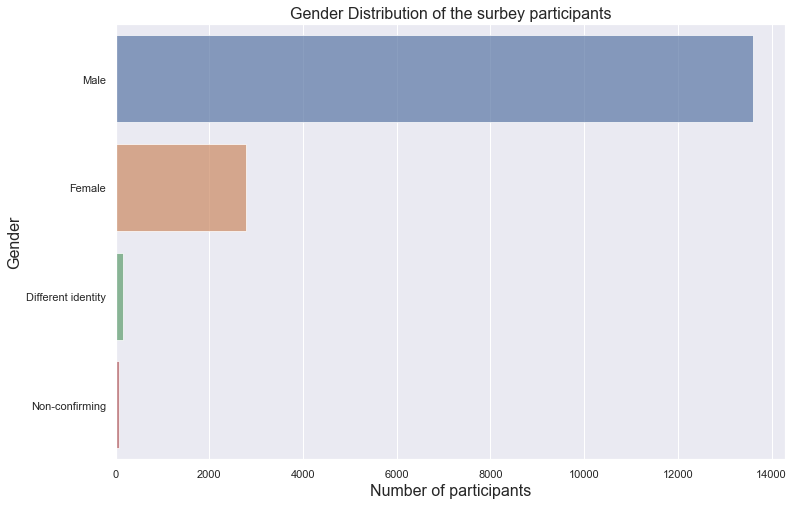

Proportion of women in this survey: 16.71%
Proportion of men in this survey: 81.88%


In [139]:
plt.figure(figsize=(12,8))
genders = data['GenderSelect'].value_counts()
sns.barplot(y=genders.index, x=genders.values, alpha=0.7)
plt.yticks(range(len(data['GenderSelect'].value_counts().index)), ['Male', 'Female', 'Different identity', 'Non-confirming'])
plt.title('Gender Distribution of the surbey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()
print('Proportion of women in this survey: {:0.2f}%'.format(100*len(data[data['GenderSelect']=='Female'])/len(data['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}%'.format(100*len(data[data['GenderSelect']=='Male'])/len(data['GenderSelect'].dropna())))

성별 격차가 매우 큽니다. 남성의 여성이 약 5배 정도 되네요.

In [140]:
print('{} instances seem to be too old (>65 years old)'.format(len(data[data['Age']>65])))
print('{} instances seem to be too young (<15 years old)'.format(len(data[data['Age']<15])))

154 instances seem to be too old (>65 years old)
35 instances seem to be too young (<15 years old)


이러한 맞지 않는 예를 제거하면(나이가 다른 속성에 영향을 미치지 않는다는 것을 나중에 알게되므로 유지합니다) 보다 좋은 결과를 얻을 수 있습니다.

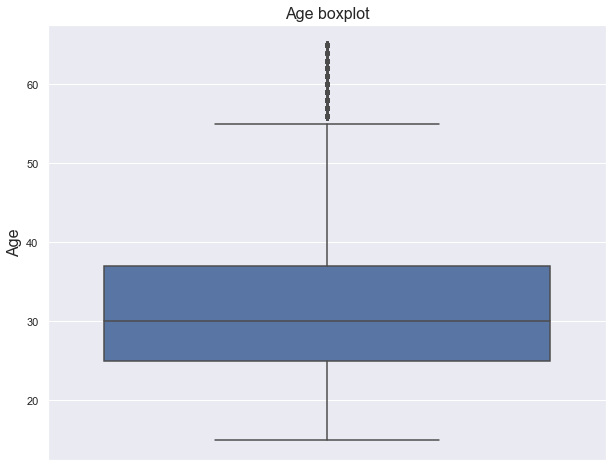

In [141]:
age=data[(data['Age']>=15) & (data['Age']<=65)]
plt.figure(figsize=(10,8))
sns.boxplot(y=age['Age'], data=age)
plt.title('Age boxplot', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

중위값은 30세이고 대다수의 참여자는 25세에서 37세 사이입니다.

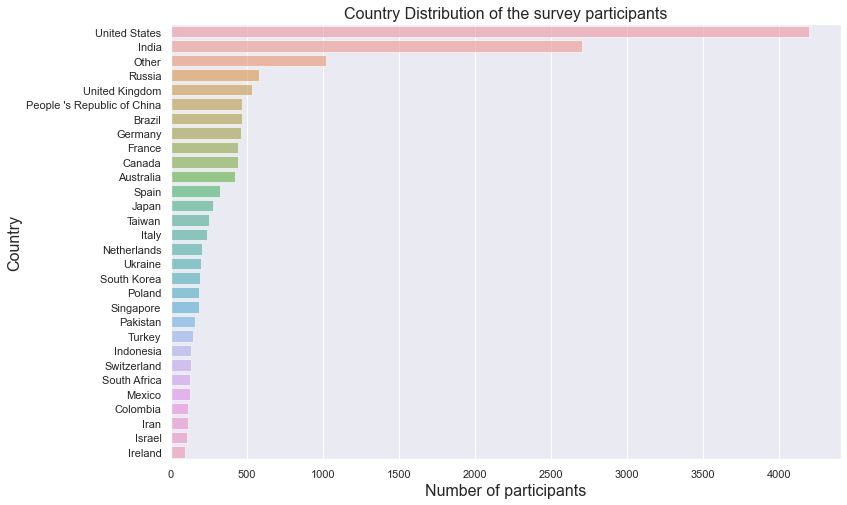

In [142]:
plt.figure(figsize=(12,8))
countries = data['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title('Country Distribution of the survey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.show()

대부분의 캐글러들은 미국인과 인도인입니다. 

In [143]:
print('{:0.2f}% of the instances are Americans'.format(100*len(data[data['Country']=='United States'])/len(data)))
print('{:0.2f}% of the instances are Indians'.format(100*len(data[data['Country']=='India'])/len(data)))

25.11% of the instances are Americans
16.18% of the instances are Indians


모든 참가자중 41.29%가 미국인 또는 인도인입니다. 

### Formal education and Major

In [144]:
edu = data['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum())*100))
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=False)
layout = go.Layout(
    title='Formal Education of the survey participants'
)
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Formal_Education')

절반에 살짝 못미치는 캐글러들이 석사학위를 가지고 있습니다. 약 80%가 학사학위를 가지고 있습니다.

In [145]:
data['MajorSelect'] = data['MajorSelect'].replace('Information technology, networking, or system administration', 'Information tech / System admin')

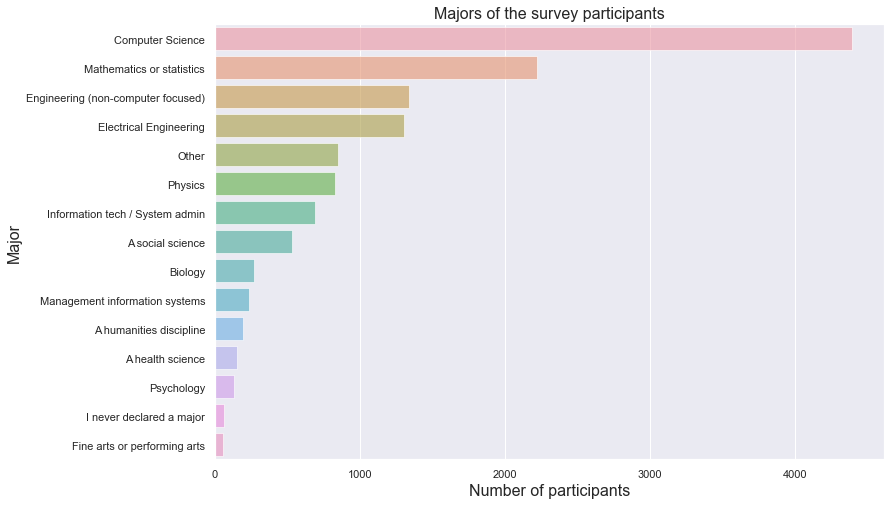

In [146]:
plt.figure(figsize=(12,8))
majors = data['MajorSelect'].value_counts()
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title('Majors of the survey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Major', fontsize=16)
plt.show()

컴퓨터 과학이 주류를 이루고 있습니다. 수학 또는 통계학의 약 두배정도입니다. 그다음으로는 공학, 전기전자공학이 뒤를 잇습니다.

### How did you start learning Data Science

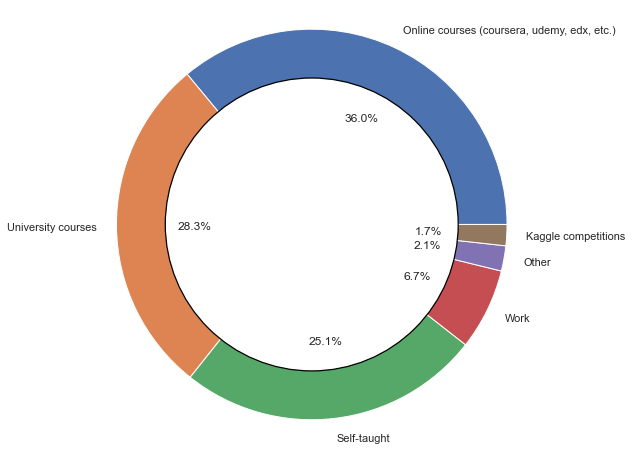

In [147]:
plt.figure(figsize=(10,8))
temp = data['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# draw a circle at the center of pie make it look like a donut
center_circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# set aspect ratio to be equal so that pie is drawn as as circle
plt.axis('equal')
plt.show()

처음 배울 때 온라인교육과정으로 배운 것이 가장 많은 선택을 받았습니다. 

캐글로 시작한 사람은 매우 작습니다. 이는 어찌보면 캐글을 경연하기 위해 참가하지 처음부터 배우기위해 오진 않기 때문에 당연한 결과이기도 합니다.

### Employment status

In [148]:
data['EmploymentStatus'] = data['EmploymentStatus'].replace('Independent contractor, freelancer, or self-employed', 'Independent')

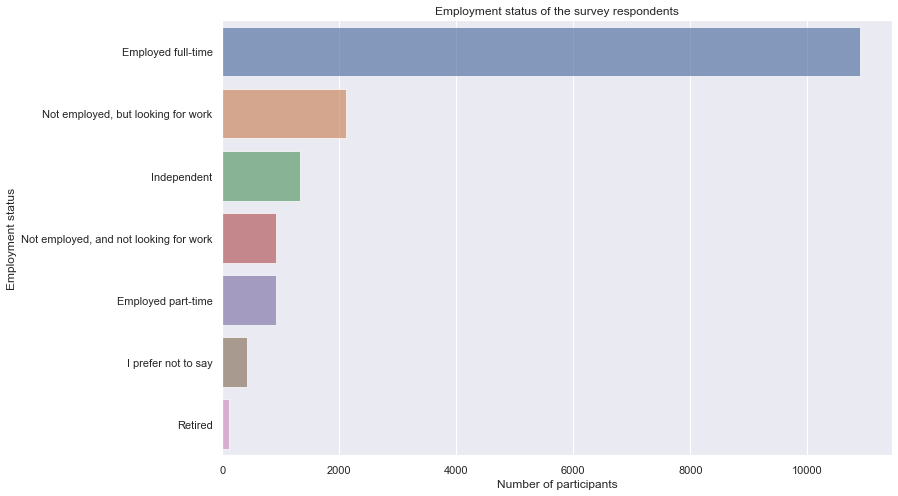

In [149]:
plt.figure(figsize=(12, 8))
status = data['EmploymentStatus'].value_counts()
sns.barplot(y=status.index, x=status.values, alpha=0.7)
plt.title('Employment status of the survey respondents')
plt.xlabel('Number of participants')
plt.ylabel('Employment status')
plt.show()

In [150]:
print('{:0.2f}% of the instances are employed full-time'.format(100*len(data[data['EmploymentStatus']=='Employed full-time'])/len(data)))
print('{:0.2f}% of the instances are employed'\
      .format(100*(status.values[0] + status.values[4])/len(data)))

65.19% of the instances are employed full-time
70.67% of the instances are employed


대다수의 사람들이 고용된 상태입니다. 그러나 프리랜서처럼 고용되지 않은 사람들도 일정 부분 존재합니다. 

### Would you like to work in Data Science?
'데이터 사이언스로의 커리어 전환을 시도하고 있습니까?'라는 흥미로운 질문이 설문에 있습니다. 오직 3012명의 응답자가 이에 응답했습니다. 제 추측은 다른 응답자들은 이미 데이터 사이언티스트로 근무하고 있어 응답할 필요가 없었거나, 아직 학생일수도 있습니다.

In [151]:
car = data['CareerSwitcher'].value_counts()
labels = (np.array(car.index))
proportions = (np.array((car/car.sum())*100))
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=labels, values=proportions,
               hoverinfo='label+percent',
               marker = dict(colors=colors,
                             line=dict(color='#000000', width=2)))

layout = go.Layout(
    title = 'Working people looking up switch careers to data science'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Career_Switcher')

아직 데이터사이언티스트가 아닌 캐글러중 70%가 데이터사이언티스트로 전환을 꿈꾸고 있습니다. 이 질문은 자유 형식 질문으로 나온 몇 안되는 질문 중 하나입니다. 즉 질문에 선택지가 없습니다. 

다음은 위 질문에 '아니오'라고 대답한 사람들이 가장 많이 상요한 단어가 무엇인지 살펴보겠습니다. ['data', 'science', 'mining', 'big', 'bigdata', 'machine', 'learning']등이 많이 나왔습니다.

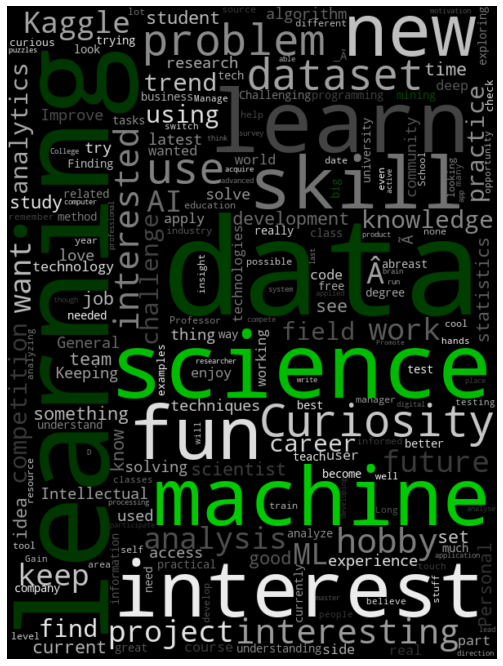

In [152]:
from wordcloud import (WordCloud, get_single_color_func)

class GroupedColorFunc(object):
    
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]
        
        self.default_color_func = get_single_color_func(default_color)
        
    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words
            )
        except StopIteration:
            color_func = self.default_color_func
            
        return color_func
    
    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
    
# get text data from the freeform
text = freeForm[pd.notnull(freeForm['KaggleMotivationFreeForm'])]['KaggleMotivationFreeForm']

wc = WordCloud(collocations=False, height=800, width=600, relative_scaling=0.2,
               random_state=74364).generate(" ".join(text))

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['data', 'science', 'mining', 'big', 'bigdata', 'machine', 'learning']
}

# Words that are not in any of the color_to_words values will be colored with grey
default_color = 'grey'

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply out color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

녹색으로 선택된 키워드는 주어진 답변에서 가장 많이 사용되는 단어입니다. 모든 단어가 어떻게 연결되어 있는지 알아보겠습니다.

- Curiosity, interest(intersting)이 자주 사용되었는데, 예를 들어 '기계 학습에 대한 관심'이라는 답이 몇 개 있었음을 암시합니다.
- hobby, fun도 빈번하게 사용되었고, 그것은 몇몇 사람들이 재미로 데이터 과학을 연습하고 대회에 참가하는 것을 암시합니다, 그들이 그 분야에서 일하고 싶어서가 아니라, 재미를 위해서라는 것이죠.
- challenge, project, competition도 인기가 많았습니다.

## 2. Python vs R: Let the battle begin!
'데이터 과학 분야에 R 또는 Python 중 무엇을 사용하십니까?'라는 질문은 데이터 과학에 대한 지망생이라면 한 번쯤은 하는 질문입니다. 몇 달 전, 여론 조사에 따르면 파이썬이 확실히 R을 앞질렀고 데이터 사이언스의 선두 언어가 되었다고 합니다. 이 설문조사는 우리가 더 깊이 파고들 수 있도록 할 것입니다.

먼저, 우리는 인스턴스 중에서 R과 Python 사용자를 식별해야 합니다. 현재 직장에서 데이터를 분석하기 위해 코드를 작성한다는 응답자(코드 작업자):
"Employed full-time" 또는 "Employed part-time"이라고 응답한 응답자만 살펴봅니다.

Python과 R의 사용빈도에 관한 질문이 있었는데, 'Rare'에서 'Most of the time'까지의 빈도로 이루어져있습니다.

대부분 Python을 사용하지만 R을 많이 사용하지 않는 사용자는 Python 사용자로 간주됩니다.
대부분 R을 사용하고 Python을 많이 사용하지 않는 사용자는 R 사용자로 간주됩니다.
R과 Python을 동일하게, 적어도 자주 사용하는 사용자는 'Both'로 분류됩니다.

In [153]:
t2 = data[['WorkToolsFrequencyR', 'WorkToolsFrequencyPython']].fillna(0)
t2.replace(to_replace=['Rarely', 'Sometimes', 'Often', 'Most of the time'], value=[1, 2, 3, 4], inplace=True)
t2['PythonVsR'] = ['R' if (freq1>2 and freq1>freq2) else
                   'Python' if (freq1<freq2 and freq2>2) else
                   'Both' if (freq1==freq2 and freq1>2) else
                   'None' for (freq1, freq2) in zip(t2['WorkToolsFrequencyR'], t2['WorkToolsFrequencyPython'])]
data['PythonVsR'] = t2['PythonVsR']

df = data[data['PythonVsR'] != 'None']
print('Python users:', len(df[df['PythonVsR'] == 'Python']))
print('R users:', len(df[df['PythonVsR'] == 'R']))
print('Python+R users:', len(df[df['PythonVsR'] == 'Both']))

Python users: 3438
R users: 1851
Python+R users: 878


파이썬만 사용하는 유저가 R만 사용하는 유저의 두배임을 알 수 있습니다.

### R and Python across the world
각 나라 사용자들이 사용어는 두 언어의 비율을 비교함으로써 전 세계적으로 어떤 영향을 미치는지 조사합니다.

In [154]:
test = df[['Country', 'PythonVsR']]
test['agg'] = np.ones(test.shape[0])

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
df['Country'].fillna('Missing', inplace=True)

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\pandas\core\series.py:4466: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
d_country = {}
for country in df['Country'].unique(): #modify to unique values
    maskp = (df['Country'] == country) & (df['PythonVsR']=='Python')
    maskr = (df['Country'] == country) & (df['PythonVsR']=='R')
    maskb = (df['Country'] == country) & (df['PythonVsR']=='Both')
    d_country[country] = {'Python': 100*len(df[maskp])/len(df[df['Country']==country]),
                          'R':  100*len(df[maskr])/len(df[df['Country']==country]),
                          'Both':  100*len(df[maskb])/len(df[df['Country']==country])}
    
pd.DataFrame(d_country).transpose()

print('Table with percentage of use for each country')
print(pd.DataFrame(d_country).transpose().head(10).round(2))

Table with percentage of use for each country
                Python      R   Both
Brazil           55.93  24.29  19.77
Russia           83.02  14.15   2.83
India            45.79  33.71  20.51
Taiwan           68.75  16.25  15.00
United States    54.99  30.32  14.70
Czech Republic   62.86  25.71  11.43
Colombia         25.49  50.98  23.53
Germany          60.00  31.56   8.44
Denmark          43.59  35.90  20.51
Poland           50.00  41.18   8.82


몇몇 나라들은 여전히 R에 크게 의존하고 있습니다. 예를 들어 인도의 코딩 작업자 중 33.71%가 여전히 R을 자주 사용하고 있으며, 콜롬비아는 절반이 R을 사용하고 25%가 파이썬을 사용합니다. 그러나, 거의 모든 나라가 R보다 Python을 더 많이 사용합니다.

이제 직장에서 이 두 언어를 사용하는지 비교해보겠습니다.

### ML methods/ algorithms and skills for R and Python

In [157]:
df['WorkMethodsSelect']=df['WorkMethodsSelect'].fillna('None')
techniques = ['Bayesian Techniques','Data Visualization', 'Logistic Regression','Natural Language Processing',
 'kNN and Other Clustering','Neural Networks','PCA and Dimensionality Reduction',
 'Time Series Analysis', 'Text Analytics','Cross-Validation']

df['WorkAlgorithmsSelect']=df['WorkAlgorithmsSelect'].fillna('None')
algorithms = ['Bayesian Techniques','Decision Trees','Random Forests','Regression/Logistic Regression',
 'CNNs', 'RNNs', 'Gradient Boosted Machines','SVMs','GANs','Ensemble Methods']

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



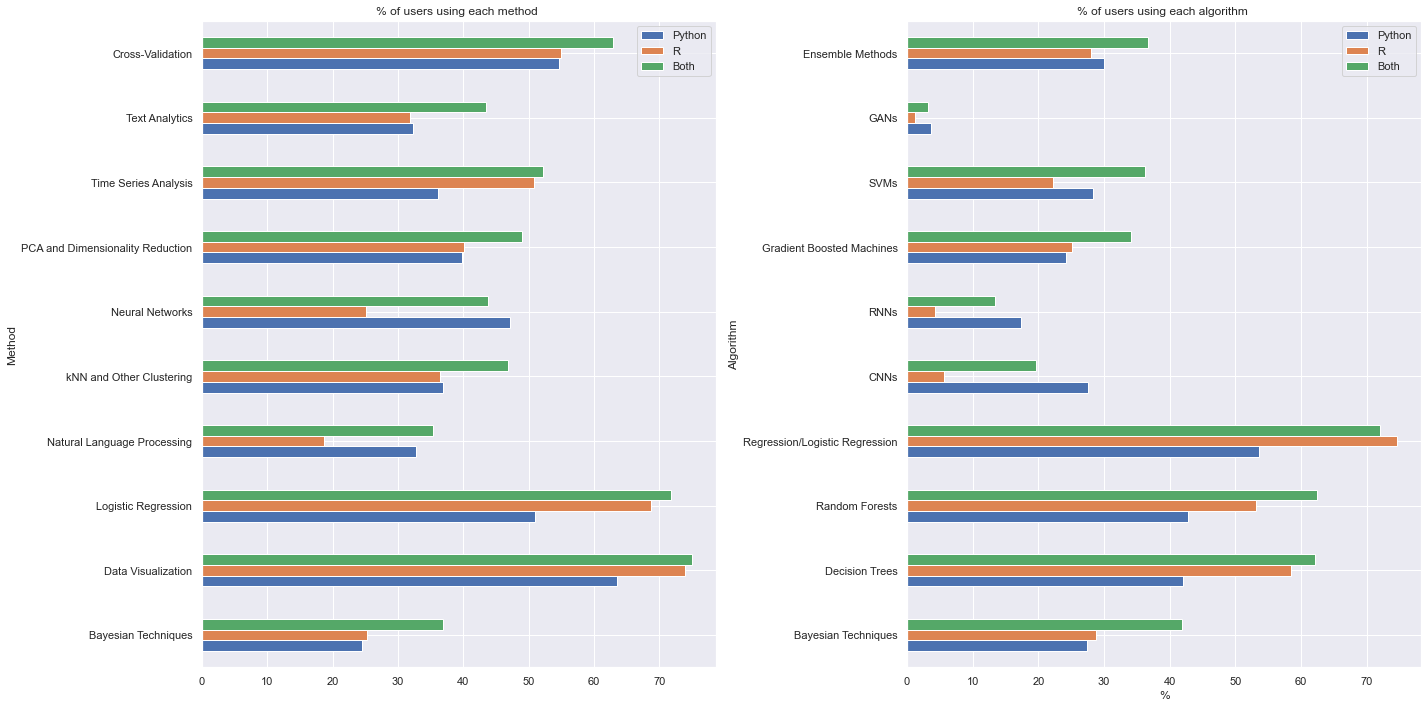

In [158]:
d={}
for technique in techniques :
    d[technique]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['WorkMethodsSelect']):
        if technique in elem : 
            d[technique][df['PythonVsR'].iloc[i]]+=1
    d[technique]['Python']=100*d[technique]['Python']/len(df[df['PythonVsR']=='Python'])
    d[technique]['R']=100*d[technique]['R']/len(df[df['PythonVsR']=='R'])
    d[technique]['Both']=100*d[technique]['Both']/len(df[df['PythonVsR']=='Both'])
    
d_algo={}
for algo in algorithms :
    d_algo[algo]={'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['WorkAlgorithmsSelect']):
        if algo in elem : 
            d_algo[algo][df['PythonVsR'].iloc[i]]+=1
    d_algo[algo]['Python']=100*d_algo[algo]['Python']/len(df[df['PythonVsR']=='Python'])
    d_algo[algo]['R']=100*d_algo[algo]['R']/len(df[df['PythonVsR']=='R'])
    d_algo[algo]['Both']=100*d_algo[algo]['Both']/len(df[df['PythonVsR']=='Both'])
            
f,ax=plt.subplots(1,2,figsize=(20,10))

(pd.DataFrame(d)).transpose().plot(kind='barh',ax=ax[0])
ax[0].set_title("% of users using each method ")
ax[0].set_xlabel('')
ax[0].set_ylabel("Method")

(pd.DataFrame(d_algo)).transpose().plot(kind='barh',ax=ax[1])
ax[1].set_title("% of users using each algorithm ")
ax[1].set_xlabel('%')
ax[1].set_ylabel("Algorithm")

plt.tight_layout()
plt.show();

내가 가장 먼저 주목한 것은 신경망(GANs/CNN/RNN)을 제외한 주어진 방법/알고리즘의 경우, 두 언어로 코딩하는 응답자 비율이 한가지로만 코딩하는 응답자 비율보다 높다는 것입니다. 파이썬 그리고 그 방법을 사용하세요! 이것은 두 언어를 모두 마스터하는 사람들이 가장 우수하고 모든 사용 가능한 방법을 사용한다는 것을 의미합니다.

방법 부분에서 데이터 시각화 및 로지스틱 회귀 분석은 R 사용자의 70%가 사용하기 때문에 R 사용자에게 기본 자산으로 보입니다. 반면, Neural Networks와 Nature Language Processing이 Python 사용자들 사이에서 가장 많이 사용되는 기법은 아니더라도, R과 Python 사용자들 사이의 차이가 가장 큰 알고리즘입니다(첫 번째 기법은 48% 대 25%, 두 번째 기법은 32% 대 19%). 

현재 Python 사용자인 경우 작업 위치, 작업 방식에 따라 알고리즘/방법이 다를 수 있습니다. 하지만 R 사용자들은 특정한 알고리즘과 방법에서 주로 사용하는 것처럼 보입니다. 다음 시각화를 통해 이를 확인할 수 있을 것입니다.

In [159]:
df['MLSkillsSelect'].fillna('None',inplace=True)
skills = ['Natural Language Processing', 'Computer Vision', 'Adversarial Learning',
          'Supervised Machine Learning (Tabular Data)', 'Reinforcement learning',
          'Unsupervised Learning', 'Outlier detection (e.g. Fraud detection)',
          'Time Series', 'Recommendation Engines']

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\pandas\core\series.py:4466: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



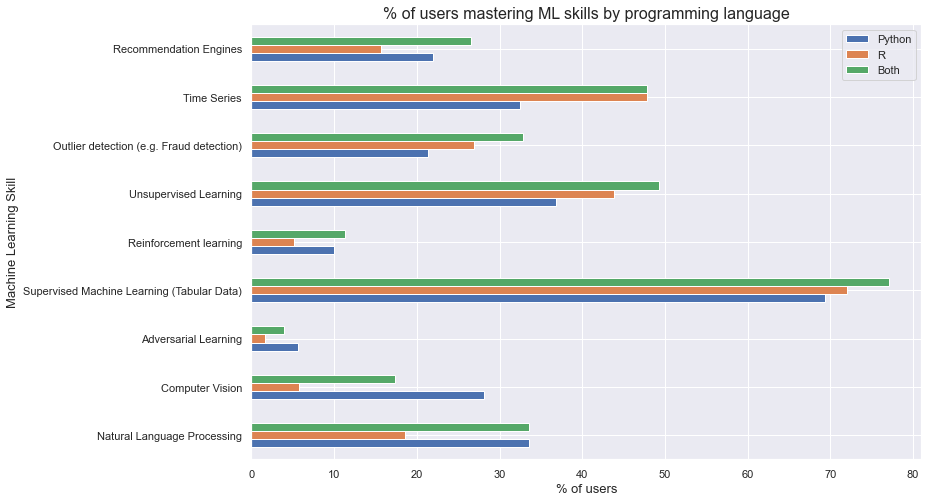

In [160]:
d_skills = {}
for skill in skills:
    d_skills[skill] = {'Python':0, 'R':0, 'Both':0}
    for (i, elem) in zip(range(df.shape[0]), df['MLSkillsSelect']):
        if skill in elem:
            d_skills[skill][df['PythonVsR'].iloc[i]]+=1
    d_skills[skill]['Python']=100*d_skills[skill]['Python'] / len(df[df['PythonVsR']=='Python'])
    d_skills[skill]['R']=100*d_skills[skill]['R'] / len(df[df['PythonVsR']=='R'])
    d_skills[skill]['Both']=100*d_skills[skill]['Both'] / len(df[df['PythonVsR']=='Both'])
    
(pd.DataFrame(d_skills)).transpose().plot(kind='barh', figsize=(12,8))
plt.ylabel('Machine Learning Skill', fontsize=13)
plt.xlabel('% of users', fontsize=13)
plt.title('% of users mastering ML skills by programming language', fontsize=16)
plt.show()    

R 사용자의 상당수는 비지도 학습, 이상치 감지, 시계열 분석 및 지도 학습에 숙련되어 있습니다. 또한, 시계열 마스터는 파이썬 사용자보다 R 사용자에게 더 중요한 것 같습니다. 그러나 강화 학습, NLP 및 컴퓨터 비전 같은 새로운 분야에서 Python은 R보다 앞서 있습니다. 실제로 Python 프로그래머의 28%는 R 프로그래머의 7%만이 컴퓨터 비전에 능숙하다고 생각하고 있습니다! NLP의 경우 차이가 크지는 않지만, 33% VS 19%입니다.

In [161]:
df['WorkDataTypeSelect'].fillna('None', inplace=True)

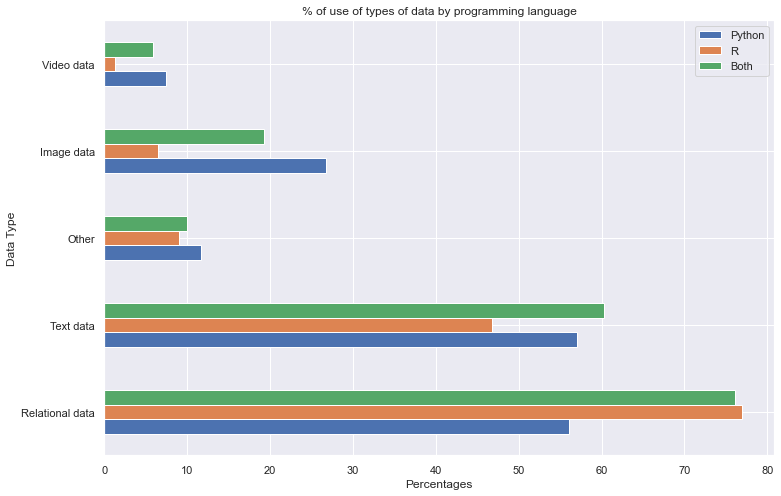

In [162]:
data_type = ['Relational data', 'Text data', 'Other', 'Image data', 'Image data', 'Video data']
d_data = {}
for dtype in data_type:
    d_data[dtype] = {'Python': 0, 'R': 0, 'Both': 0}
    for (i, elem) in zip(range(df.shape[0]), df['WorkDataTypeSelect']):
        if dtype in elem:
            d_data[dtype][df['PythonVsR'].iloc[i]]+=1
    d_data[dtype]['Python']=100*d_data[dtype]['Python']/len(df[df['PythonVsR']=='Python'])
    d_data[dtype]['R']=100*d_data[dtype]['R']/len(df[df['PythonVsR']=='R'])
    d_data[dtype]['Both']=100*d_data[dtype]['Both']/len(df[df['PythonVsR']=='Both'])
    
(pd.DataFrame(d_data)).transpose().plot(kind='barh', figsize=(12,8))
plt.ylabel('Data Type')
plt.xlabel('Percentages')
plt.title('% of use of types of data by programming language')
plt.show()

Python 사용자의 27%는 이미지 데이터 세트를 처리하고 60%는 텍스트 데이터 세트를 처리합니다. 반면, R 사용자의 7%만이 이미지 데이터 세트를 처리하고 47%는 텍스트 데이터 세트를 처리합니다. 이미지 부분에서, ML 기술에서는 컴퓨터 비전에 능숙한 R 사용자를 거의 찾을 수 없었습니다.
반면, R 사용자의 78%는 관계형 데이터를 처리하는 반면, Python 사용자의 56%만이 그러한 종류의 데이터를 처리합니다.
즉, R 사용자는 주로 관계형 데이터셋만 사용하는 회사에서 일하는 경향이 있는 반면 Python 사용자는 더 다재다능합니다!
다시, 이것은 알고리즘 플롯이 했던 것과 같은 이야기이고 그것들 사이에는 연관성이 있습니다. 만약 텍스트/이미지 데이터를 다룰 것이라면, 신경망을 사용하는 것이 더 낫습니다.

이전 4개의 그래프에서 빼낸 내용은 다음과 같습니다.

- 딥 러닝(컴퓨터 비전, NLP...)과 관련된 알고리즘/방법/데이터셋을 사용하는 R 코더의 비율은 매우 작으며 모든 R 코더는 일부 특정 영역에 특화되어 있습니다.
- 많은 수의 Python 코더는 로지스틱 회귀 분석과 같은 기본/클래식 자료를 사용하지만 R 사용자와 달리 딥 러닝에 초점을 맞추고 있습니다.
- R과 Python 코더가 일할 때 어떤 작업을 하는지 알아보겠습니다.

### Industry and Job Title

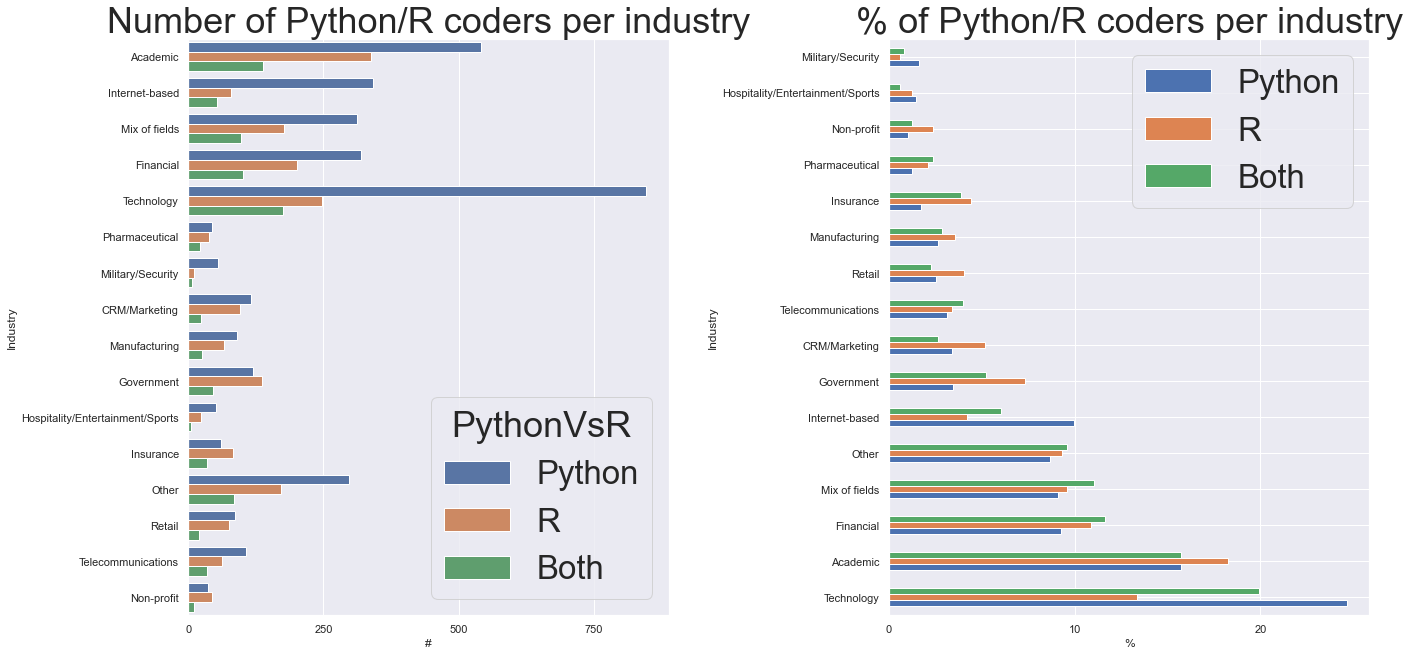

In [163]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.set(font_scale=3)
sns.countplot(y='EmployerIndustry', hue='PythonVsR', data=df, ax=ax[0])
ax[0].set_title('Number of Python/R coders per industry')
ax[0].set_xlabel('#')
ax[0].set_ylabel('Industry')

d_ind = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR']==value]
    d_ind[value]={}
    for industry in df['EmployerIndustry'].value_counts().index:
        d_ind[value][industry]=100*len(temp[temp['EmployerIndustry']==industry])/len(temp)
        
(pd.DataFrame(d_ind)).plot(kind='barh', ax=ax[1])
ax[1].set_title('% of Python/R coders per industry')
ax[1].set_xlabel('%')
ax[1].set_ylabel('Industry')

plt.tight_layout()
plt.show()

왼쪽 그림은 R 사용자보다 Python 사용자가 더 많다고 해도, 오른쪽 그림(비율상으로) R이 여전히 우세하거나 Python만큼 경쟁력 있는 산업이 있다는 것을 알수있습니다.

정부, 보험, 비영리, 제약, 소매 및 마케팅 분야에서 R은 Python만큼 많이 쓰입니다.
Python은 이 설문 조사에서 응답자가 가장 많은 업계이기도 한 기술 산업에서 R을 크게 앞섭니다(데이터 사이언티스트가 기술 직종이기 때문에 그럴 만도 합니다.
오른쪽 그림은 산업에 관한 한 R이 더 다재다능해 보인다는 것을 보여줍니다. 비율을 보면 Python보다 R이 훨씬 더 균형 잡힌 것을 알 수 있습니다.

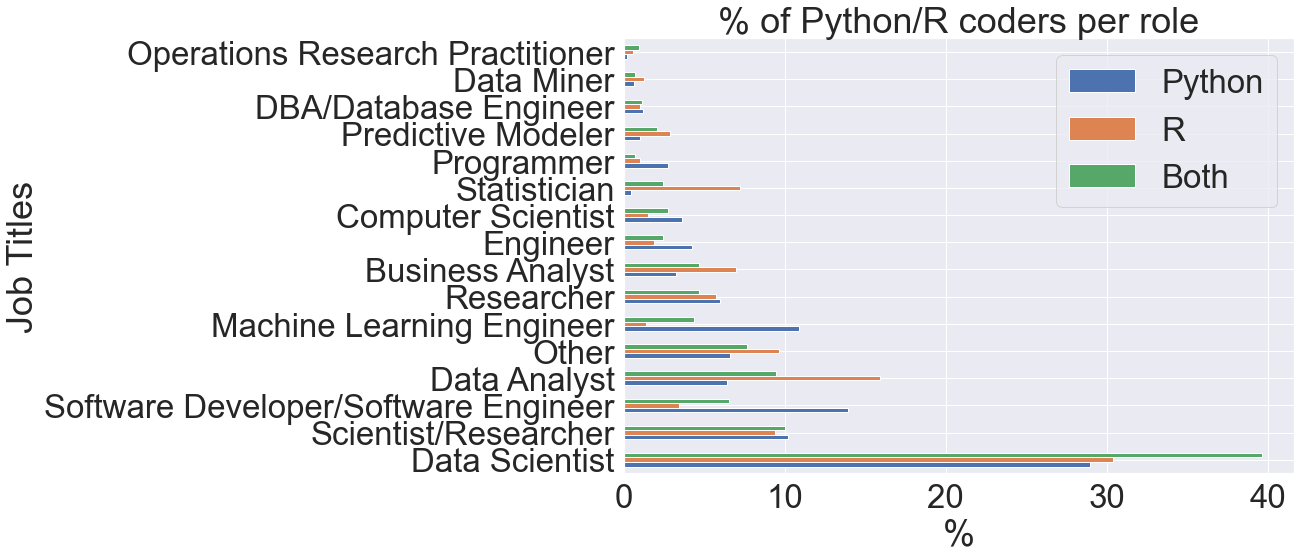

In [164]:
d_title = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR']==value]
    d_title[value] = {}
    for title in df['CurrentJobTitleSelect'].value_counts().index:
        d_title[value][title] = 100*len(temp[temp['CurrentJobTitleSelect']==title])/len(temp)
        
ax = (pd.DataFrame(d_title)).plot(kind='barh', figsize=(12,8))
ax.set_title('% of Python/R coders per role')
ax.set_xlabel('%')
ax.set_ylabel('Job Titles')
plt.show()

- 대부분의 R과 파이썬 코더들은 데이터사이언티스트 입니다. 
- 약 25%의 파이썬 코더들은 소프트웨어 엔지니어또는 머신러닝엔지니어인 반면 R코더의 5% 만이 위 직업에 해당합니다.
- 30%의 R 코더들은 통계학자, 데이터분석가, 비지니스 분석가인 반면 파이썬 코더는 11%에 불과합니다.

데이터사이언티스트를 제외하면 R코더가 높은 비중을 차지하는 역할은 파이썬 코더의 비중이 적습니다.

지금까지는 시각화를 통헤 분석했습니다. 이번에는 두 범주형 변수 사이의 의존성을 평가하는 카이제곱검정을 사용합니다.

In [165]:
from scipy.stats import chi2_contingency

conti = pd.crosstab(data['MajorSelect'], data['CurrentJobTitleSelect'])
conti

CurrentJobTitleSelect,Business Analyst,Computer Scientist,DBA/Database Engineer,Data Analyst,Data Miner,Data Scientist,Engineer,Machine Learning Engineer,Operations Research Practitioner,Other,Predictive Modeler,Programmer,Researcher,Scientist/Researcher,Software Developer/Software Engineer,Statistician
MajorSelect,,,,,,,,,,,,,,,,
A health science,10,4,2,13,1,18,1,4,1,17,1,5,9,26,6,2
A humanities discipline,11,3,3,33,4,29,3,6,0,28,2,5,13,16,15,5
A social science,38,1,2,89,5,137,4,5,5,50,11,6,51,37,17,11
Biology,8,1,1,19,2,69,5,5,0,18,1,3,9,73,14,9
Computer Science,105,206,70,238,27,530,101,262,4,254,23,187,176,186,859,11
Electrical Engineering,49,22,14,69,9,176,131,82,4,81,13,24,83,82,191,5
Engineering (non-computer focused),105,11,19,73,7,236,140,45,9,118,21,24,45,89,105,13
Fine arts or performing arts,5,1,0,4,0,5,1,1,0,13,0,3,7,1,8,0
I never declared a major,3,0,0,7,0,7,3,2,0,6,0,0,2,2,13,1


정확하게는 모든 값이 5보다 커야 카이제곱검정을 적용할 수 있습니다. 그렇지만 테스트를 어떻게 수행하는지 보여주기 위해 진행하겠습니다.

In [166]:
p_value = chi2_contingency(conti, lambda_='log-likelihood')[1]
p_value

0.0

카이제곱 검정에서 반환하는 p값은 양수입니다. p값이 낮을수록 두 범주형 피처의 상관 관계가 더 높습니다. 여기서는 p=0가 나왔습니다.  

### Main function and percentage of time for specific tasks

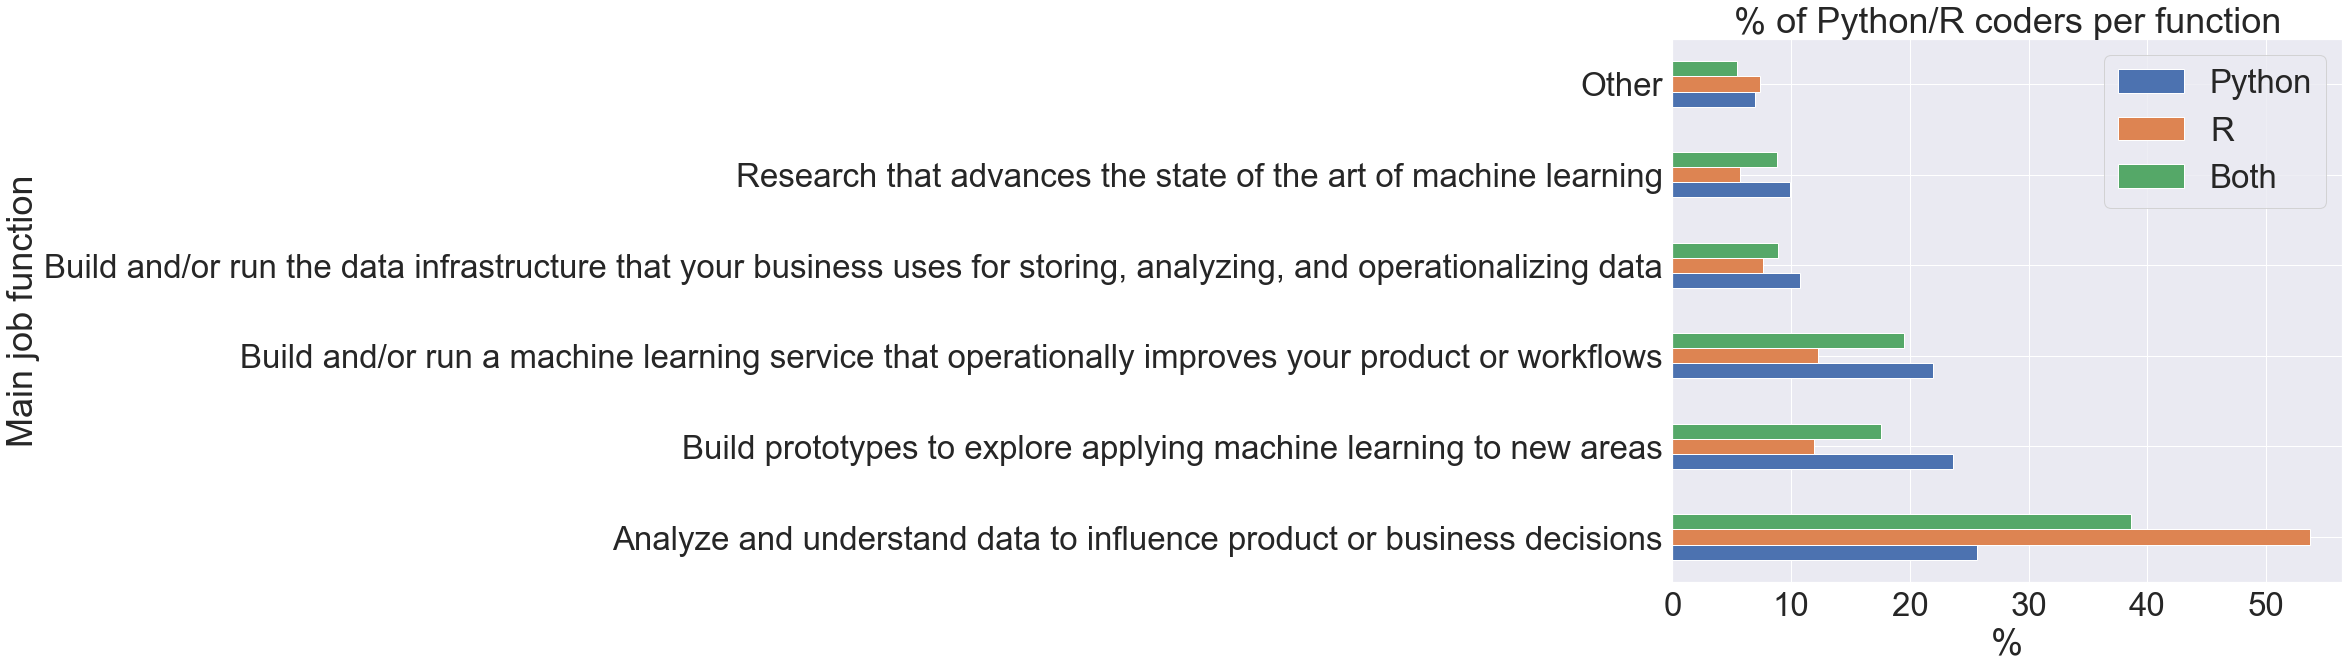

In [167]:
d_title = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR']==value]
    d_title[value] = {}
    for title in df['JobFunctionSelect'].value_counts().index:
        d_title[value][title]=100*len(temp[temp['JobFunctionSelect']==title])/len(temp)
        
ax = (pd.DataFrame(d_title)).plot(kind='barh', figsize=(12,10))
ax.set_title('% of Python/R coders per function')
ax.set_xlabel('%')
ax.set_ylabel('Main job function')
plt.show()

대부분의 R 사용자는 비즈니스/데이터 분석 부분과 관련된 작업을 수행하는 경향이 있는 것으로 보입니다. 앞서 살펴본 내용을 상기해 보겠습니다. R코더의 70% 이상이 데이터 시각화를 사용하고 있으며 20% 이상이 비즈니스 분석가 또는 데이터 분석가(역할)입니다. 따라서, 여기서 R 사용자의 업무 역할은 대부분 비즈니스 목적으로 데이터를 분석하는 것임을 알 수 있습니다.
반면에 Python 사용자는 모든 작업을 조금씩 수행하고 있으며 비즈니스 분석, ML 프로토타입 구축, 제품 개선을 위한 ML 서비스 구축 등 세 가지 작업에서 높은 비율을 차지하고 있습니다.

그렇다면 DS 작업의 각 작업(데이터 수집, 시각화...)에 대한 작업량은 얼마나 될까요?

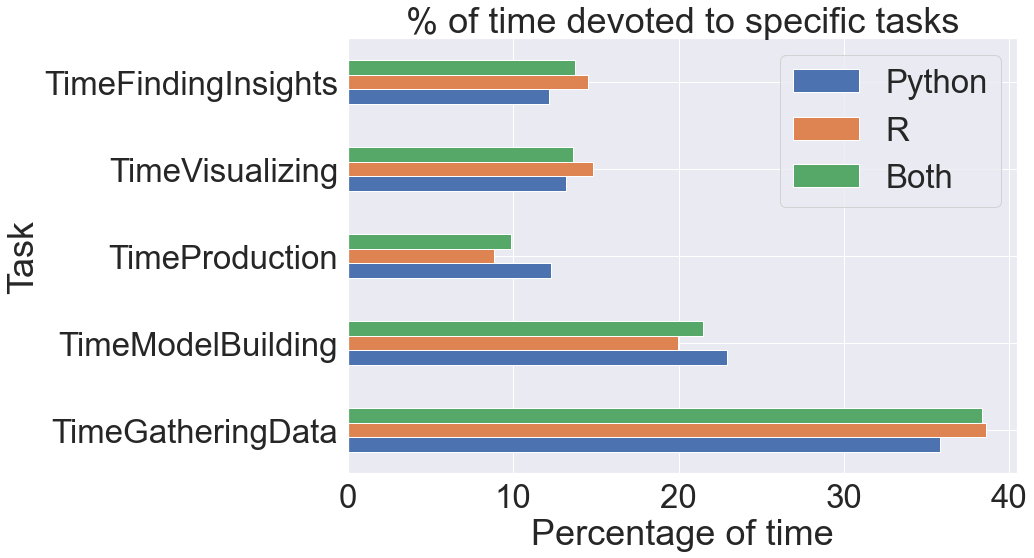

In [168]:
d_task = {}
tasks = ['TimeGatheringData', 'TimeModelBuilding', 'TimeProduction', 'TimeVisualizing', 'TimeFindingInsights']
for task in tasks:
    d_task[task] = {'Python':df[df['PythonVsR']=='Python'][task].mean(),
                    'R':df[df['PythonVsR']=='R'][task].mean(),
                    'Both':df[df['PythonVsR']=='Both'][task].mean()}
    
(pd.DataFrame(d_task)).transpose().plot(kind='barh', figsize=(12,8))
plt.ylabel('Task')
plt.xlabel('Percentage of time')
plt.title('% of time devoted to specific tasks')
plt.show()

두 종류의 코더는 대부분 데이터 수집(Python 사용자의 경우 38%, R의 경우 40%)과 모델 구축(Python의 경우 19%, R의 경우 18%)에 소비합니다.
일반적으로 두 종류의 코더는 거의 모든 작업에 동일한 시간을 투자하는 것으로 보입니다. 이것은 R이나 Python을 사용하는 것이 특정 용도에 대한 의무라기보다는 선호에 가깝다는 것을 의미합니다.

즉, 관찰된 가장 큰 차이는 작업을 프로덕션에 투입하는 경우입니다(Python 사용자는 12%, R은 7%).

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



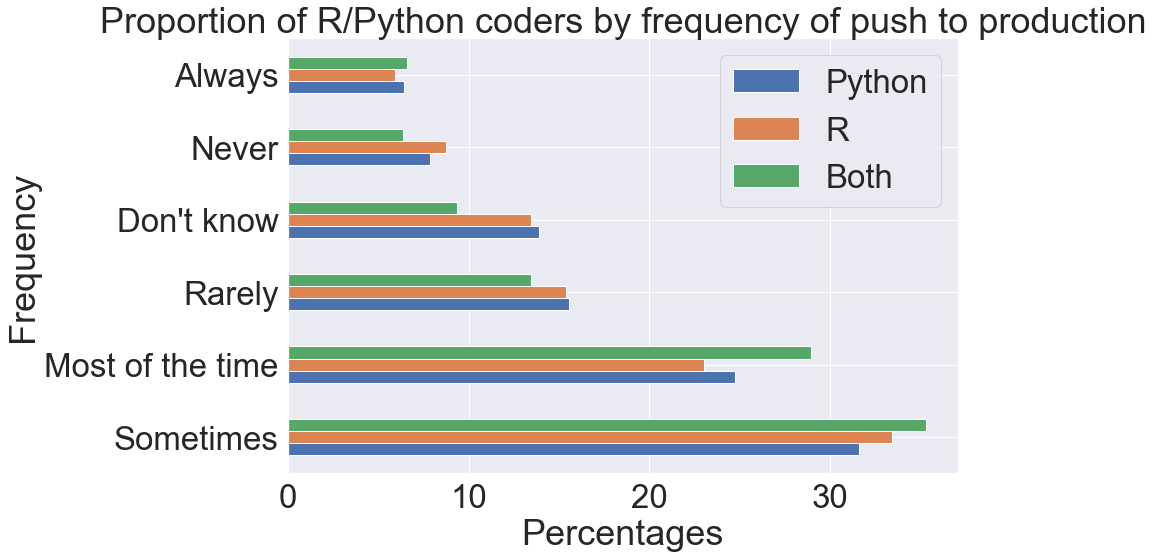

In [169]:
df['WorkProductionFrequency'] = df['WorkProductionFrequency'].fillna("Don't know")

d_prod = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR']==value]
    d_prod[value] = {}
    for frequency in df['WorkProductionFrequency'].value_counts().index:
        d_prod[value][frequency]=100*len(temp[temp['WorkProductionFrequency']==frequency])/len(temp)
        
(pd.DataFrame(d_prod)).plot(kind='barh', figsize=(12,8))
plt.ylabel('Frequency')
plt.xlabel('Percentages')
plt.title('Proportion of R/Python coders by frequency of push to production')
plt.show()

- Always와 Most of the time을 합치면 Python 사용자의 35.63%/R 사용자의 30.43%가 거의 항상 모델을 프로덕션에 푸시한다는 것을 알 수 있습니다.
- Never와 Rarely를 결합하면 Python 사용자의 22.07% / R 사용자의 23.27%가 모델을 프로덕션에 푸시하지 않습니다. Python 사용자는 6.46%, R 사용자는 11.25%로 격차가 더 큽니다.
R 코더는 생산 작업의 중요성을 감소시키는 것으로 보입니다.

### Experience as code-writers

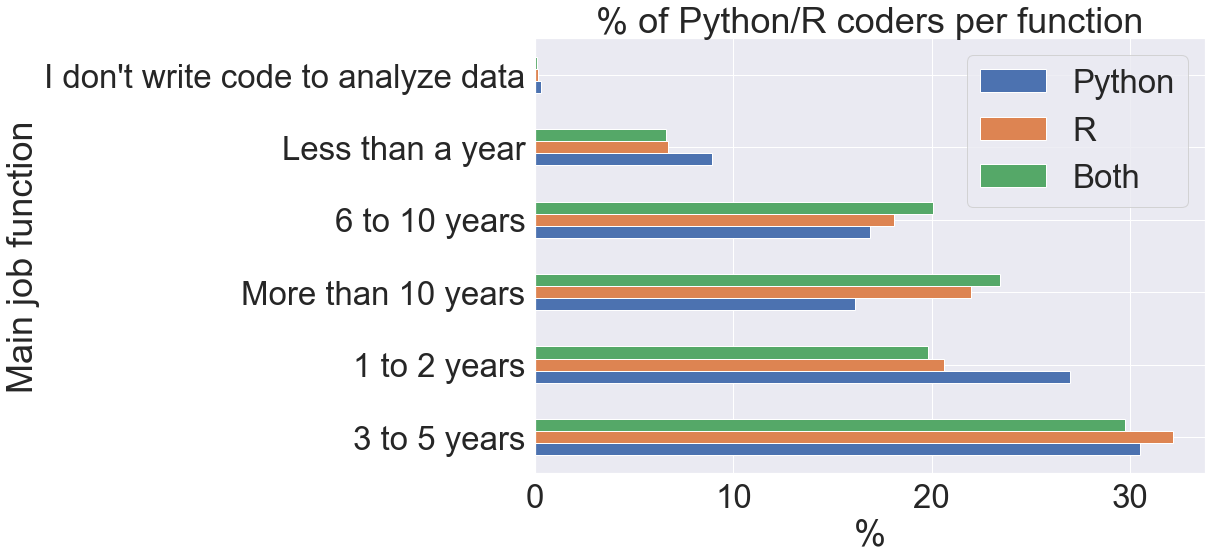

In [170]:
d_tenure = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR']==value]
    d_tenure[value] = {}
    for dur in df['Tenure'].value_counts().index:
        d_tenure[value][dur]=100*len(temp[temp['Tenure']==dur])/len(temp)
        
ax = (pd.DataFrame(d_tenure)).plot(kind='barh', figsize=(12,8))
ax.set_title('% of Python/R coders per function')
ax.set_xlabel('%')
ax.set_ylabel('Main job function')
plt.show()

- R 및 파이썬 모두 가장 많이 투표된 기간은 3-5년입니다.
- 파이썬의 경우 두 번째로 많이 투표된 기간은 1-2년이고, R의 경우 두 번째로 많이 투표된 기간은 실제로 '10년 이상'입니다!
우리는 R 코더가 지난 5년 동안 파이썬이 더 널리 사용되기 시작한 동안 코드를 더 오랫동안 써왔기 때문에 더 경험이 많은 경향이 있다고 결론을 내릴 수 있습니다.

### What language would you recommend for DS beginners

In [171]:
df['LanguageRecommendationSelect'].fillna('Other', inplace=True)

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\pandas\core\series.py:4466: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



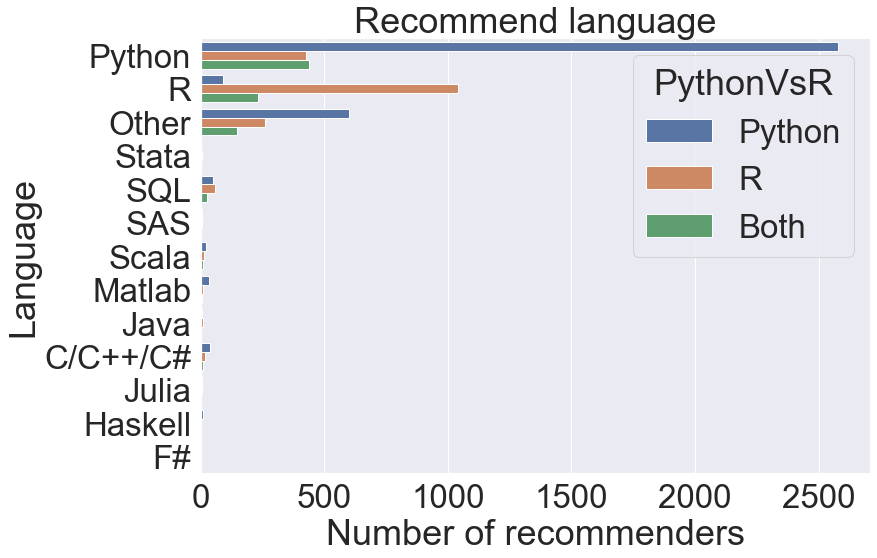

Proportion of Python users who recommend R as the first language to learn: 2.68%
Proportion of R users who recommend Python as the first language to learn: 23.12%


In [172]:
plt.figure(figsize=(12,8))
sns.countplot(y='LanguageRecommendationSelect', hue='PythonVsR', data=df)
plt.ylabel('Language')
plt.xlabel('Number of recommenders')
plt.title('Recommend language')
plt.show()

mask1 = (df['LanguageRecommendationSelect']=='R') & (df['PythonVsR']=='Python')
print('Proportion of Python users who recommend R as the first language to learn: {:0.2f}%'.format(100*len(df[mask1])/len(df[df['PythonVsR']=='Python'])))

mask1 = (df['LanguageRecommendationSelect']=='Python') & (df['PythonVsR']=='R')
print('Proportion of R users who recommend Python as the first language to learn: {:0.2f}%'.format(100*len(df[mask1])/len(df[df['PythonVsR']=='R'])))


각 공동체의 대다수는 사용하는 언어를 추천했습니다. 그러나 R 사용자는 Python 사용자보다 Python 사용자를 훨씬 더 많이 추천합니다! 실제로 Python 사용자의 2.63%만이 R을 추천했고 R 사용자의 23.12%는 Python을 추천했습니다. 이는 이제 R 커뮤니티의 일부가 파이썬이 머신 러닝에서 효과적이라는 것을 받아들인 것을 의미합니다.
또한 R만큼 Python을 사용하는 사람들도 R보다 Python을 더 많이 추천하고 있다는 것을 알 수 있습니다.

## 3. US working Kagglers: Annual income analysis
이 부분에서는 20개의 피쳐를 선택할 것입니다. 주로 인구 통계학적인 부분을 살펴봅니다.

In [173]:
demographic_features = ['GenderSelect','Country','Age',
                        'FormalEducation','MajorSelect','ParentsEducation',
                        'EmploymentStatus', 'CurrentJobTitleSelect',
                        'DataScienceIdentitySelect','CodeWriter',
                        'CurrentEmployerType','JobFunctionSelect',
                        'SalaryChange','RemoteWork','WorkMLTeamSeatSelect',
                        'Tenure','EmployerIndustry','EmployerSize','PythonVsR',
                        'CompensationAmount']
data_dem = data[demographic_features]
data_dem.head()

,GenderSelect,Country,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Bachelor's degree,Management information systems,A doctoral degree,Employed full-time,DBA/Database Engineer,Yes,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I am not currently employed,Always,Standalone Team,More than 10 years,Internet-based,100 to 499 employees,None,NaN
1,Female,United States,30.0,Master's degree,Computer Science,A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Less than a year,NaN,NaN,None,NaN
2,Male,Canada,28.0,Master's degree,Engineering (non-computer focused),A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,3 to 5 years,NaN,NaN,None,NaN
3,Male,United States,56.0,Master's degree,Mathematics or statistics,High school,Independent,Operations Research Practitioner,Yes,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,NaN,Standalone Team,More than 10 years,Mix of fields,NaN,None,"250,000"
4,Male,Taiwan,38.0,Doctoral degree,Engineering (non-computer focused),Primary/elementary school,Employed full-time,Computer Scientist,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I do not want to share information about my sa...,Rarely,Business Department,More than 10 years,Technology,"5,000 to 9,999 employees",None,NaN


### American Kagglers annual income
응답자의 73%가 고용되어 있다고 해도(파트 1 참조), 26.83%만이 소득에 대한 적절한 대답을 했기 때문에  매우 정확하게 말할 수 없습니다.

모든 급여를 USD로 환산한 다음 모든 응답자를 모든 데이터 과학자의 급여 중위수와 같은 값으로 계산하는 것을 별로 좋아보이지 않습니다. 예를 들어, 미국에서 10만$를 받는 것은 인도나 포르투갈에서 같은 금액을 받는 것과는 전혀 비교할 수 없기 때문입니다.
모든 급여를 달러로 환산하는 게 낫겠지만 각 나라를 따로따로 취급하는 게, 모든 것에 대한 중앙값을 확인하는 것보다 훨씬 더 말이 된다고 생각합니다.

가장 대표되는 나라인 미국의 시민들에 대한 급여만 확인해서 결과를 얻어보겠습니다.

In [174]:
#Convert all salarises to floats
data_dem['CompensationAmount'] = data_dem['CompensationAmount'].fillna(0)
data_dem['CompensationAmount'] = data_dem.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0)) else float(x.replace(',','')))

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



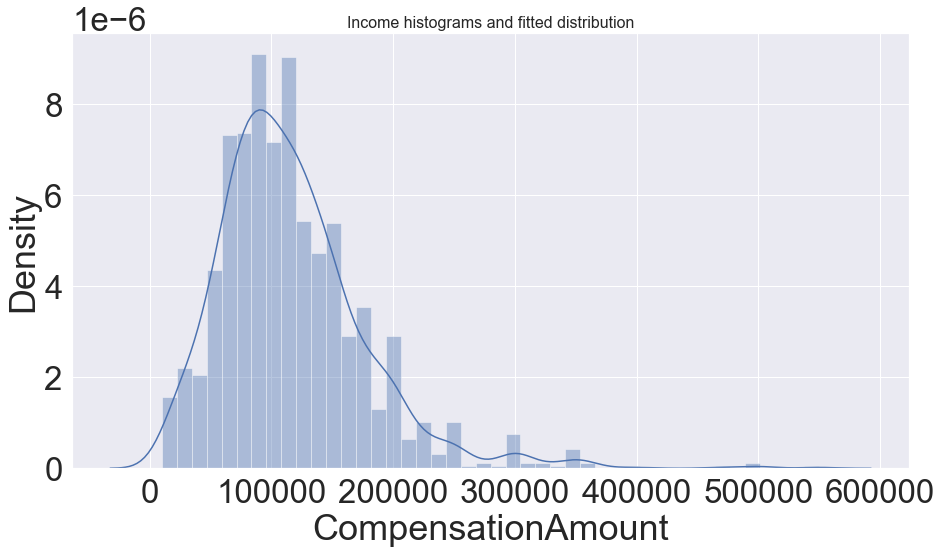

In [175]:
# Remove Outliers
data_dem = data_dem[(data_dem['CompensationAmount']>5000) & (data_dem['CompensationAmount']<1000000)]
data_dem = data_dem[data_dem['Country'] == 'United States']

plt.subplots(figsize=(15, 8))
sns.distplot(data_dem['CompensationAmount'])
plt.title('Income histograms and fitted distribution', size=16)
plt.show()

In [176]:
print('The median salary for US data scientist: {}USD'.format(data_dem['CompensationAmount'].median()))
print('The mean salary for US data scientist: {:0.2f}USD'.format(data_dem['CompensationAmount'].mean()))

The median salary for US data scientist: 107000.0USD
The mean salary for US data scientist: 116649.99USD


대부분의 캐글러가 7만에서 13만 달러 사이의 수입을 가지고 있고, skewness가 있습니다. 이는 이상치가 오른쪽에 많이 분포함을 의미합니다.


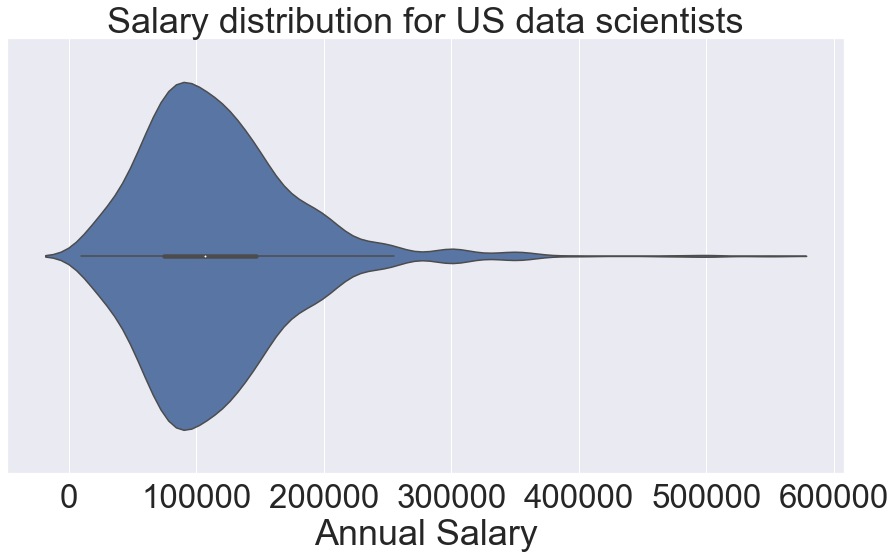

In [177]:
plt.figure(figsize=(15,8))
sns.violinplot(x='CompensationAmount', data=data_dem)
plt.title('Salary distribution for US data scientists')
plt.xlabel('Annual Salary')
plt.show()

### Salary vs Gender

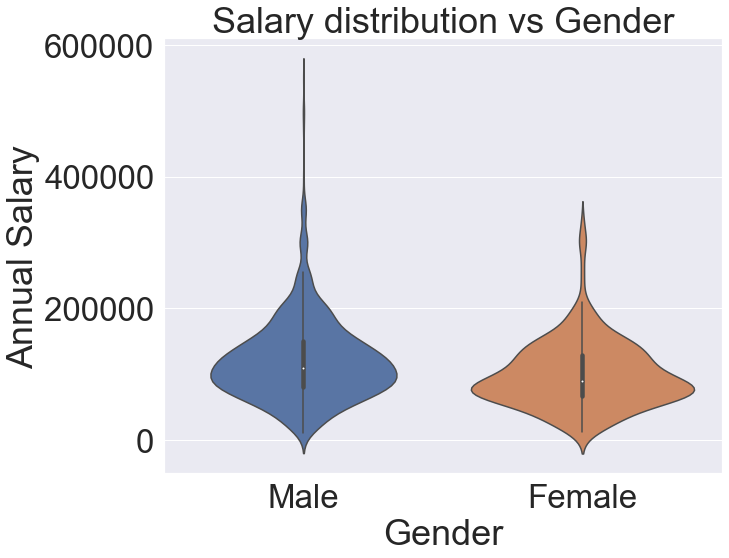

In [178]:
temp = data_dem[data_dem.GenderSelect.isin(['Male', 'Female'])]
plt.figure(figsize=(10,8))
sns.violinplot(y='CompensationAmount', x='GenderSelect', data=temp)
plt.title('Salary distribution vs Gender')
plt.ylabel('Annual Salary')
plt.xlabel('Gender')
plt.show()

남성 평균은 여성 평균보다 약간 높습니다.
수입이 400k 이상인 여성은 없고, 남성 부분에는 특이치가 있습니다.

### Salary vs Formal Education

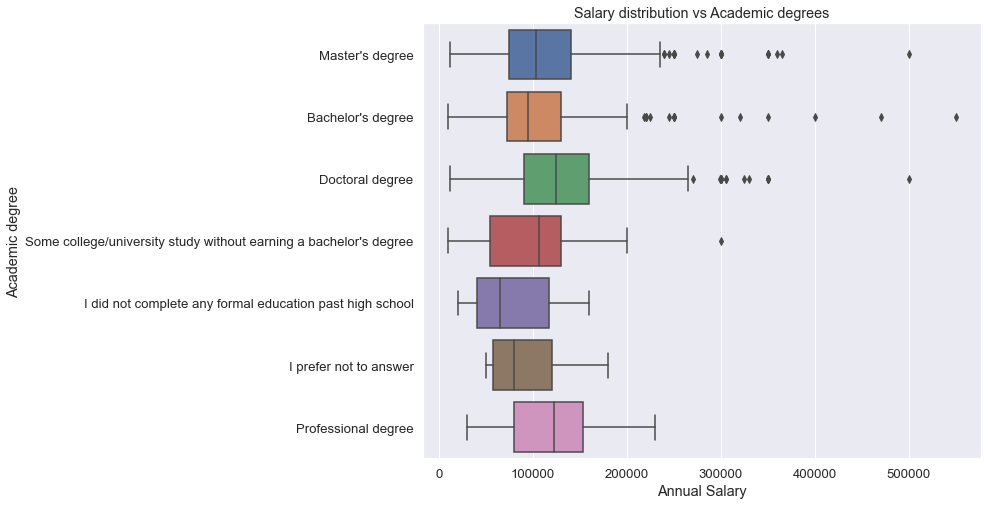

In [179]:
sns.set(font_scale=1.2)
titles = list(data_dem['FormalEducation'].value_counts().index)
temp = data_dem[data_dem.FormalEducation.isin(titles)]
plt.figure(figsize=(10,8))
sns.boxplot(x='CompensationAmount', y='FormalEducation', data=temp)
plt.title('Salary distribution vs Academic degrees')
plt.xlabel('Annual Salary')
plt.ylabel('Academic degree')
plt.show()

중위수는 합리적인 추세를 따릅니다. 즉, 높은 교육을 받았을수록 연간 중위소득이 높습니다.

대학에 다녔지만 학위를 가지고 있지 않은 사람들의 중위수는 학사 및 석사 학위 소지자들의 중위수보다 높지만, 1분위수는 다른 두 공동체의 1분위수보다 훨씬 작습니다.

### Salary vs Job Title

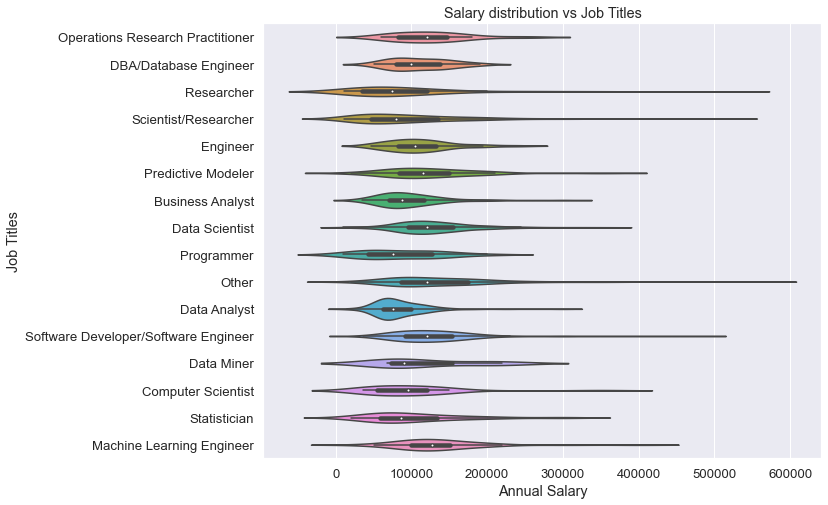

In [180]:
titles = list(data_dem['CurrentJobTitleSelect'].value_counts().index)
temp = data_dem[data_dem.CurrentJobTitleSelect.isin(titles)]
plt.figure(figsize=(10,8))
sns.violinplot(x='CompensationAmount', y='CurrentJobTitleSelect', data=temp)
plt.title('Salary distribution vs Job Titles')
plt.xlabel('Annual Salary')
plt.ylabel('Job Titles')
plt.show()

머신러닝 엔지니어 또는 데이터 사이언티스트는 연평균 소득이 데이터 분석가, 비즈니스 분석가, 통계학자 또는 프로그래머보다 높습니다.

### Dimensionality reduction and 2D-plotting
가장 잘 알려진/사용되는 차원 축소 기법은 PCA입니다. PCA의 문제점은 PCA가 수치/연속 변수에 가장 적합하다는 것입니다.

범주형 데이터에 대한 차원축소를 위해 유사한 기술인 다중 대응 분석(MCA)이 사용됩니다. 간단히 말해, 카이제곱 독립성 검정을 사용하여 행렬에 추가로 포함될 점 사이의 거리를 만드는 기술입니다. 이 행렬의 각 고유값은 관성(PCA의 표현된 분산과 유사함)을 가지며 2D 시각화를 얻는 프로세스는 동일합니다.

In [181]:
data_dem['CompensationAmount'] = pd.cut(data_dem['CompensationAmount'],bins=[0,130000,1000000],
                                            include_lowest=True,labels=[1,2])
data_dem['Age'] = pd.cut(data_dem['Age'],bins=[0,18,25,30,35,40,50,60,100],
                           include_lowest=True,labels=[1,2,3,4,5,6,7,8])
data_dem.drop('Country',axis=1,inplace=True)

### Income Prediction: Classification ML problem
지금까지 우리는 Kaggle로부터 얻은 데이터를 분석하고 시각화해 왔습니다. 사실, 우리가 전에 봤듯이, 데이터 과학자들의 시간의 20%만이 기계 학습과 모형 제작에 할애됩니다! 음, 우리는 이러한 비율을 존중할 것이고 실제로 미국의 캐글러의 수입이 130k$ 이상인지 아닌지를 예측하는 간단한 모델을 포함할 것입니다. 고전적인 분류 문제입니다!

우리는 정교한 모형을 구축하지 않고 간단한 로지스틱 회귀 분석을 사용해 쉽게 이해할 수 있으며, 앞으로 알게 될 것처럼 결과도 나쁘지 않을 것입니다.

#### Preprocessing and feature engineering
우리의 데이터 세트에는 범주형 변수만 포함되어 있습니다(연령은 특정 시점에 빈칸으로 표시되기도 함).
범주형 변수를 처리할 때 가장 많이 사용되는 두 가지 매개 변수는 다음과 같습니다.

- 레이블 인코딩: 즉, 숫자로 대체합니다. 예를 들어 학사 학위는 1, 석사는 2가 됩니다. 변수가 순서형일 때, 즉 변수의 가능한 값 사이에 자연 순서가 있을 때(예: 정규 교육의 경우) 이것이 최선의 해결책입니다.
- 원 핫 인코딩 : 자세한 설명을 위해 범주를 "이항화"하는 것을 의미합니다(여기 참조).
우리는 모든 범주형 변수에 대해 원핫 인코딩을 수행하고 훈련과 테스트 세트를 구축할 것입니다.

In [182]:
temp=data_dem

target = temp['CompensationAmount']
target.replace(to_replace=[1,2], value=[0,1],inplace=True )
temp.drop('CompensationAmount',axis=1,inplace=True)
temp2=pd.get_dummies(data=temp,columns=list(temp))

np.random.seed(42)
perm = np.random.permutation(temp2.shape[0])
X_train , y_train = temp2.iloc[perm[0:round(0.8*temp2.shape[0])]] , target.iloc[perm[0:round(0.8*temp2.shape[0])]]
X_test , y_test = temp2.iloc[perm[round(0.8*temp2.shape[0])::]] , target.iloc[perm[round(0.8*temp2.shape[0])::]]

각 클래스의 비율과 관련하여 어떤 문제가 있는지 확인해보겠습니다.

In [183]:
print('Number of US kagglers with an income lower than 130k$ : {}'.format(len(target)-target.sum()))
print('Number of US kagglers with an income higher than 130k$ : {}'.format(target.sum()))

Number of US kagglers with an income lower than 130k$ : 1024
Number of US kagglers with an income higher than 130k$ : 489


미국 응답자의 32%가 130k$ 이상의 소득을 가지고 있으므로 데이터 세트는 약간 불균형적이지만 크게 걱정하지 않습니다.
X_train 및 X_test는 분명히 매우 희소하므로(각 행에 0이 많음) 모델을 구축할 때 참고할 것입니다.

#### Building the predictive model

In [184]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import operator

clf = LogisticRegression(penalty='l1', C=0.05, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train, y_train)

coefs = np.transpose(clf.coef_)

coef_l1_LR = clf.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print('Sparsity achieved: %.2f%%' % sparsity_l1_LR)

feature_importance = {}
for (feature, k) in zip(list(X_train), range(len(coefs))):
    feature_importance[feature] = abs(coefs[k])
sorted_features = sorted(feature_importance.items(), key=operator.itemgetter(1))
top5 = sorted_features[-5::]
top5

Sparsity achieved: 91.41%


[('EmployerIndustry_Academic', array([0.48841926])),
 ('Tenure_1 to 2 years', array([0.49989666])),
 ('CurrentJobTitleSelect_Data Analyst', array([0.50430741])),
 ('Age_2', array([0.62381415])),
 ('Tenure_More than 10 years', array([0.79425675]))]

L1 패널티는 솔루션의 높은 희소성(0의 백분율)을 달성합니다. C 값이 클수록 모형에 더 많은 자유도가 부여됩니다. 반대로, C 값이 작을수록 모형이 더 제약됩니다.

C=0.05는 로지스틱 회귀 분석의 매우 작은 값이며 91.41%의 희소성을 달성합니다. 이렇게 하면 계수를 0 로 축소하여 모형이 가장 중요한 피쳐만 간주할 수 있습니다. 게다가, 우리는 최종 분류기를 만들기 위해 훨씬 더 높은 C를 사용할 것입니다.

우리는 가장 중요한 특징이 '10년 이상 코딩하셨습니까?'라는 질문에 대한 대답이라는 것을 알게 되었습니다. 그 뒤에 '18세에서 25세 사이입니까?'라는 답이 나옵니다.

In [185]:
clf = LogisticRegression(penalty='l1', C=1, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train, y_train)
y_p = clf.predict(X_test)

accuracy, precision, recall = accuracy_score(y_test, y_p), precision_score(y_test, y_p), recall_score(y_test, y_p)
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100*accuracy))
print('Precision achieved by the classifier: {:0.2f}%'.format(100*precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100*recall))

Accuracy achieved by the classifier: 76.24%
Precision achieved by the classifier: 68.48%
Recall achieved by the classifier: 59.43%


다음을 고려하면 정말 좋은 점수입니다.

- 로지스틱 회귀 분석은 가장 쉽고 간단하게 작성하고 이해할 수 있는 분류기입니다.
- 우리는 단지 18개의 인구통계학적 특징과 원핫 인코딩한 것을 선택하였습니다.
따라서 기본 사전 처리와 기본 모델만으로 68%의 정밀도와 60%의 리콜을 얻을 수 있습니다!
정확성(#올바른 출력 / #총 출력)도 그리 나쁘지는 않지만 데이터 세트가 약간 불균형적이기 때문에 좋다고는 할 수 없습니다.

로지스틱 회귀 분석에서는 확률을 출력합니다. 임계값(기본값 0.5)은 출력을 이항화하는 데 사용됩니다. 즉, 확률>0.5이면 양의 클래스를 예측하고 그렇지 않으면 음의 클래스를 예측합니다.
데이터 세트가 불균형적이기 때문에 임계값을 줄이면 높은 값이 나올 확률이 적기 때문에 더 나은 결과를 얻을 수 있습니다. 이것이 바로 임계값을 감소/증가할 때 정밀도와 리콜 간의 균형을 관찰하는 데 기본적으로 도움이 되는 ROC 곡선을 그리는 이유입니다. 

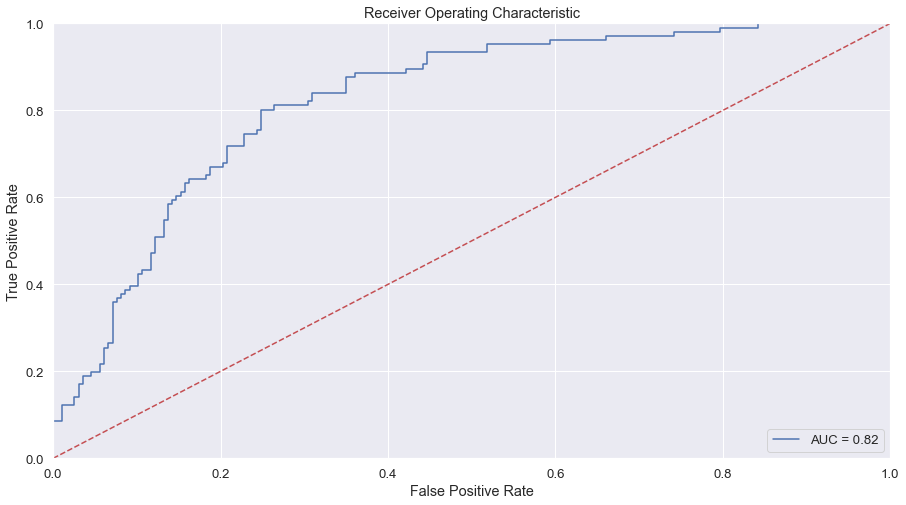

In [186]:
probs = clf.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC 점수가 그리 높지 않아 임계값을 수정해도 모델이 크게 개선되지 않을 수 있습니다.

이제 캐글의 학습자 커뮤니티를 분석해보겠습니다!


## 4. Welcome to Data Science
이 Kaggle Survey 참가자들은 모두 경험이 풍부한 데이터 과학자는 아니었습니다.

그들 중 많은 사람들은 여전히 데이터 과학자가 되기를 갈망하고 있으며, 갈 길이 멉니다. 어떤 이들은 여전히 학생이고, 어떤 이들은 직업 전환을 찾고 있지만, 그들은 모두 공통점을 가지고 있습니다 그들은 학습자입니다!

그렇다면 이러한 목적을 위해 어떤 플랫폼을 사용하고 있을까요? 그들은 무엇을 가장 배우고 싶습니까? 그들이 어떤 직업을 찾고 있나요? 그렇다면, 우리가 그 질문에 대답할 수 있는지 봅시다!

응답자 유형 README 파일에 따르면 학습자는 다음과 같을 수 있습니다.

- 학생들
- 공식적으로 또는 비공식적으로 데이터 과학 기술을 배우는 사람
- 직업 전환을 원하는 전문가입니다.
- 실업자이지만 직장인을 찾고 있습니다.

먼저 이러한 특성 중 하나 이상을 가진 인스턴스를 포함하는 데이터 프레임을 추출합니다.

In [187]:
df_students = data[data['StudentStatus']=='Yes']
df_ds = data[(data['LearningDataScience']=="Yes, but data science is a small part of what I'm focused on learning") | (data['LearningDataScience']=="Yes, I'm focused on learning mostly data science skills")]
df_c = data[data['CareerSwitcher']=='Yes']
df_e = data[data['EmploymentStatus']=='Not employed, but looking for work']

learners = pd.concat((df_students, df_ds, df_c, df_e))
learners = learners[~learners.index.duplicated(keep='first')]

print('{} participants on this survey are learners.'.format(len(learners)))
print('In other words, {:0.2f}% of the participants on this survey are learners.'.format(100*len(learners)/len(data)))

5494 participants on this survey are learners.
In other words, 32.87% of the participants on this survey are learners.


### Demographics properties
먼저, 어떤 나라가 가장 많은 학습자를 가지고 있는지 보고, 그들의 나이와 성별의 분포도를 체크해 봅시다.

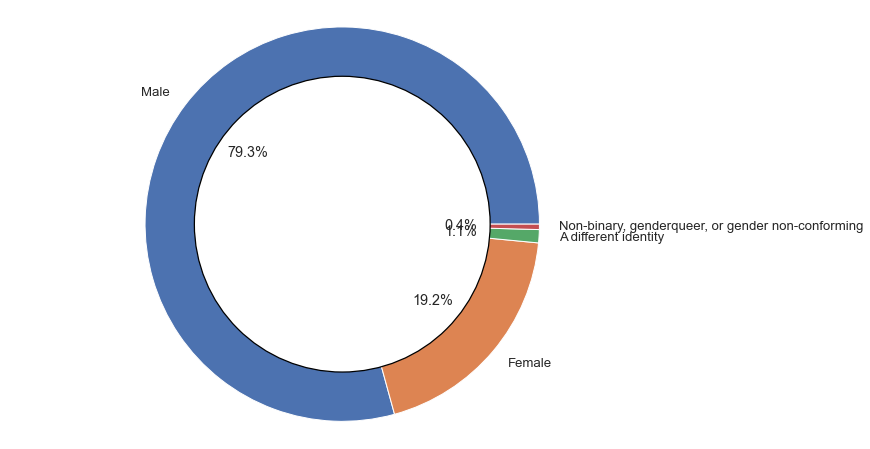

In [188]:
plt.figure(figsize=(12,8))

sex = learners['GenderSelect'].value_counts()
labels = (np.array(sex.index))
proportions = (np.array((sex / sex.sum())*100))

plt.pie(proportions, labels=labels, autopct='%1.1f%%')

circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.axis('equal')
plt.show()

일반적인 비율(여성 16.71%, 남성 81.88%)에 비해 약간의 진전이 있음을 알 수 있습니다. 이것은 점점 더 많은 여성들이 데이터 사이언스를 배우는데 참여하고 관심이 있다는 것을 의미합니다. 좋은 소식입니다.

In [189]:
print("Learners' median age", learners['Age'].median())

Learners' median age 26.0


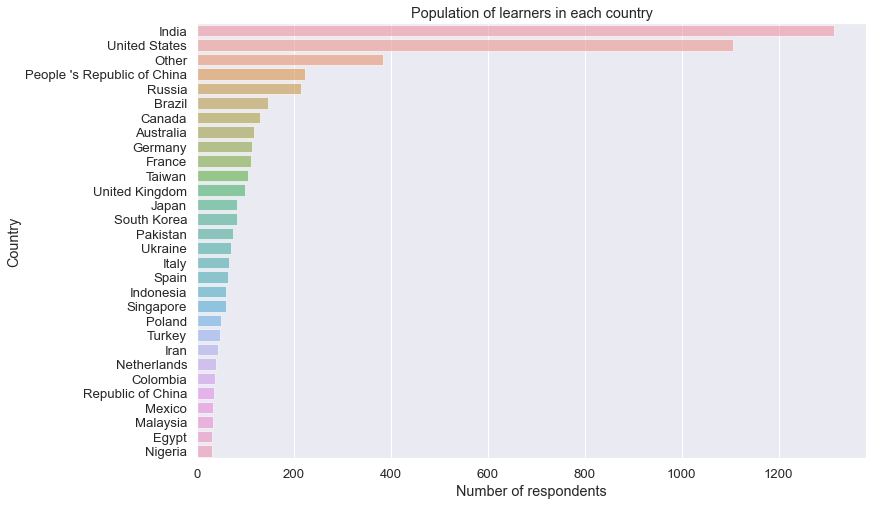

In [190]:
plt.figure(figsize=(12,8))
countries = learners['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title('Population of learners in each country')
plt.xlabel('Number of respondents')
plt.ylabel('Country')
plt.show()

흥미롭게도, 인도는 미국보다 데이터 과학 학습자가 더 많습니다!

이 EDA의 첫 부분에서 본 결과, 몇몇 나라들은 이 설문조사에 참가하지 않았습니다. 더 의미 있는 통계는 각국의 kaggle 응답자 중 학습자의 비율입니다.

In [191]:
d_pcountries = {}
for value in data['Country'].value_counts().index:
    d_pcountries[value] = 100*len(learners[learners['Country']==value])/len(data[data['Country']==value])
learners_p = pd.DataFrame.from_dict(d_pcountries, orient='index')
learners_p = learners_p.reset_index(drop=False)
learners_p.rename(columns= {'index': 'Country', 0: '% of learners'}, inplace=True)

In [192]:
LOCDATA="""COUNTRY,GDP (BILLIONS),CODE
Afghanistan,21.71,AFG
Albania,13.40,ALB
Algeria,227.80,DZA
American Samoa,0.75,ASM
Andorra,4.80,AND
Angola,131.40,AGO
Anguilla,0.18,AIA
Antigua and Barbuda,1.24,ATG
Argentina,536.20,ARG
Armenia,10.88,ARM
Aruba,2.52,ABW
Australia,1483.00,AUS
Austria,436.10,AUT
Azerbaijan,77.91,AZE
"Bahamas, The",8.65,BHM
Bahrain,34.05,BHR
Bangladesh,186.60,BGD
Barbados,4.28,BRB
Belarus,75.25,BLR
Belgium,527.80,BEL
Belize,1.67,BLZ
Benin,9.24,BEN
Bermuda,5.20,BMU
Bhutan,2.09,BTN
Bolivia,34.08,BOL
Bosnia and Herzegovina,19.55,BIH
Botswana,16.30,BWA
Brazil,2244.00,BRA
British Virgin Islands,1.10,VGB
Brunei,17.43,BRN
Bulgaria,55.08,BGR
Burkina Faso,13.38,BFA
Burma,65.29,MMR
Burundi,3.04,BDI
Cabo Verde,1.98,CPV
Cambodia,16.90,KHM
Cameroon,32.16,CMR
Canada,1794.00,CAN
Cayman Islands,2.25,CYM
Central African Republic,1.73,CAF
Chad,15.84,TCD
Chile,264.10,CHL
"People 's Republic of China",10360.00,CHN
Colombia,400.10,COL
Comoros,0.72,COM
"Congo, Democratic Republic of the",32.67,COD
"Congo, Republic of the",14.11,COG
Cook Islands,0.18,COK
Costa Rica,50.46,CRI
Cote d'Ivoire,33.96,CIV
Croatia,57.18,HRV
Cuba,77.15,CUB
Curacao,5.60,CUW
Cyprus,21.34,CYP
Czech Republic,205.60,CZE
Denmark,347.20,DNK
Djibouti,1.58,DJI
Dominica,0.51,DMA
Dominican Republic,64.05,DOM
Ecuador,100.50,ECU
Egypt,284.90,EGY
El Salvador,25.14,SLV
Equatorial Guinea,15.40,GNQ
Eritrea,3.87,ERI
Estonia,26.36,EST
Ethiopia,49.86,ETH
Falkland Islands (Islas Malvinas),0.16,FLK
Faroe Islands,2.32,FRO
Fiji,4.17,FJI
Finland,276.30,FIN
France,2902.00,FRA
French Polynesia,7.15,PYF
Gabon,20.68,GAB
"Gambia, The",0.92,GMB
Georgia,16.13,GEO
Germany,3820.00,DEU
Ghana,35.48,GHA
Gibraltar,1.85,GIB
Greece,246.40,GRC
Greenland,2.16,GRL
Grenada,0.84,GRD
Guam,4.60,GUM
Guatemala,58.30,GTM
Guernsey,2.74,GGY
Guinea-Bissau,1.04,GNB
Guinea,6.77,GIN
Guyana,3.14,GUY
Haiti,8.92,HTI
Honduras,19.37,HND
Hong Kong,292.70,HKG
Hungary,129.70,HUN
Iceland,16.20,ISL
India,2048.00,IND
Indonesia,856.10,IDN
Iran,402.70,IRN
Iraq,232.20,IRQ
Ireland,245.80,IRL
Isle of Man,4.08,IMN
Israel,305.00,ISR
Italy,2129.00,ITA
Jamaica,13.92,JAM
Japan,4770.00,JPN
Jersey,5.77,JEY
Jordan,36.55,JOR
Kazakhstan,225.60,KAZ
Kenya,62.72,KEN
Kiribati,0.16,KIR
"Korea, North",28.00,PRK
"Korea, South",1410.00,KOR
Kosovo,5.99,KSV
Kuwait,179.30,KWT
Kyrgyzstan,7.65,KGZ
Laos,11.71,LAO
Latvia,32.82,LVA
Lebanon,47.50,LBN
Lesotho,2.46,LSO
Liberia,2.07,LBR
Libya,49.34,LBY
Liechtenstein,5.11,LIE
Lithuania,48.72,LTU
Luxembourg,63.93,LUX
Macau,51.68,MAC
Macedonia,10.92,MKD
Madagascar,11.19,MDG
Malawi,4.41,MWI
Malaysia,336.90,MYS
Maldives,2.41,MDV
Mali,12.04,MLI
Malta,10.57,MLT
Marshall Islands,0.18,MHL
Mauritania,4.29,MRT
Mauritius,12.72,MUS
Mexico,1296.00,MEX
"Micronesia, Federated States of",0.34,FSM
Moldova,7.74,MDA
Monaco,6.06,MCO
Mongolia,11.73,MNG
Montenegro,4.66,MNE
Morocco,112.60,MAR
Mozambique,16.59,MOZ
Namibia,13.11,NAM
Nepal,19.64,NPL
Netherlands,880.40,NLD
New Caledonia,11.10,NCL
New Zealand,201.00,NZL
Nicaragua,11.85,NIC
Nigeria,594.30,NGA
Niger,8.29,NER
Niue,0.01,NIU
Northern Mariana Islands,1.23,MNP
Norway,511.60,NOR
Oman,80.54,OMN
Pakistan,237.50,PAK
Palau,0.65,PLW
Panama,44.69,PAN
Papua New Guinea,16.10,PNG
Paraguay,31.30,PRY
Peru,208.20,PER
Philippines,284.60,PHL
Poland,552.20,POL
Portugal,228.20,PRT
Puerto Rico,93.52,PRI
Qatar,212.00,QAT
Romania,199.00,ROU
Russia,2057.00,RUS
Rwanda,8.00,RWA
Saint Kitts and Nevis,0.81,KNA
Saint Lucia,1.35,LCA
Saint Martin,0.56,MAF
Saint Pierre and Miquelon,0.22,SPM
Saint Vincent and the Grenadines,0.75,VCT
Samoa,0.83,WSM
San Marino,1.86,SMR
Sao Tome and Principe,0.36,STP
Saudi Arabia,777.90,SAU
Senegal,15.88,SEN
Serbia,42.65,SRB
Seychelles,1.47,SYC
Sierra Leone,5.41,SLE
Singapore,307.90,SGP
Sint Maarten,304.10,SXM
Slovakia,99.75,SVK
Slovenia,49.93,SVN
Solomon Islands,1.16,SLB
Somalia,2.37,SOM
South Africa,341.20,ZAF
South Sudan,11.89,SSD
Spain,1400.00,ESP
Sri Lanka,71.57,LKA
Sudan,70.03,SDN
Suriname,5.27,SUR
Swaziland,3.84,SWZ
Sweden,559.10,SWE
Switzerland,679.00,CHE
Syria,64.70,SYR
Taiwan,529.50,TWN
Tajikistan,9.16,TJK
Tanzania,36.62,TZA
Thailand,373.80,THA
Timor-Leste,4.51,TLS
Togo,4.84,TGO
Tonga,0.49,TON
Trinidad and Tobago,29.63,TTO
Tunisia,49.12,TUN
Turkey,813.30,TUR
Turkmenistan,43.50,TKM
Tuvalu,0.04,TUV
Uganda,26.09,UGA
Ukraine,134.90,UKR
United Arab Emirates,416.40,ARE
United Kingdom,2848.00,GBR
United States,17420.00,USA
Uruguay,55.60,URY
Uzbekistan,63.08,UZB
Vanuatu,0.82,VUT
Venezuela,209.20,VEN
Vietnam,187.80,VNM
Virgin Islands,5.08,VGB
West Bank,6.64,WBG
Yemen,45.45,YEM
Zambia,25.61,ZMB
Zimbabwe,13.74,ZWE
    """

with open("location_map.csv", "w") as ofile:
    ofile.write(LOCDATA)

In [193]:
loc_df = pd.read_csv('./location_map.csv')
new_df = pd.merge(learners_p, loc_df, left_on='Country', right_on='COUNTRY')
new_df = new_df[['Country', 'CODE', '% of learners']]

data_t = [dict(
    type = 'choropleth',
    location = new_df['CODE'],
    z = new_df['% of learners'],
    text = new_df['Country'],
    colorscale = [[0, 'rgb(210, 210, 210)'], [4500, 'rgb(220, 220, 220)']],
    autocolorscale = False,
    reversescale = True,
    marker = dict(
        line = dict(
            color = 'rgb(180, 180, 180)',
            width = 0.5
        )
    ),
    colorbar = dict(
        autotick = False,
        title = 'Proportion of learners (in%)'
    )
)]

layout = dict(
    title = 'Country wise proportion of learners',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict(data=data_t, layout=layout)
py.iplot(fig, validate=False, filename='d3-world-map')

In [194]:
edu = learners['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum())*100))

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=False)

layout = go.Layout(
    title = 'Formal Education of learners respondents'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Formal_Education2')

대부분의 학습자는 학사 학위를 소지하고 있습니다(이전에는 모든 응답자에게 가장 빈번한 교육이 석사 학위였습니다). 그것은 주로 우리가 학습자들 사이에서 아직 공부를 끝내지 못한 학생들을 발견하기 때문입니다.

이제 이러한 학습자들이 데이터 과학자가 되기 위해 어떤 플랫폼을 사용하고 있는지 알아보겠습니다.

### Platforms used for learning

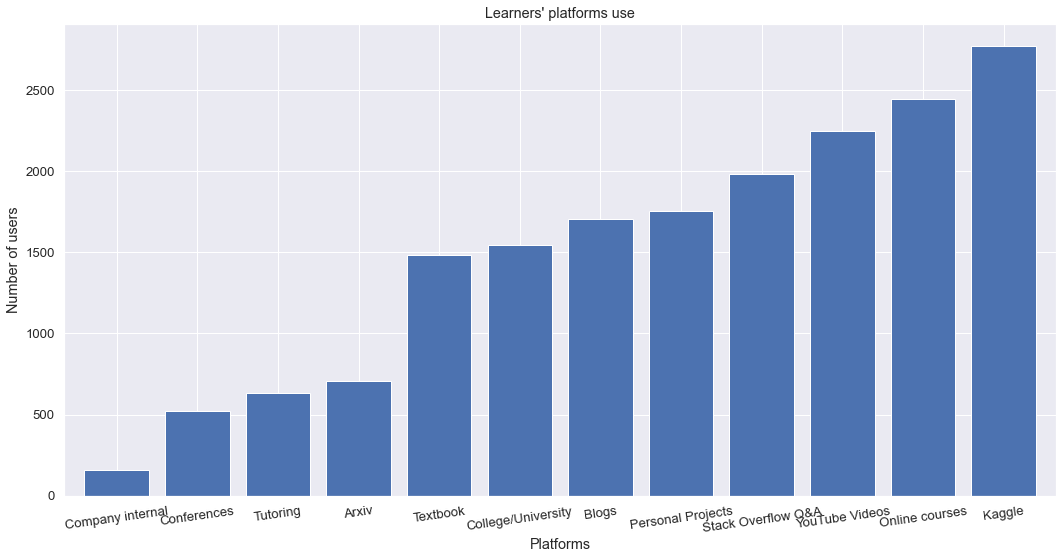

In [198]:
d_plat = {}
platforms = ['College/University','Kaggle','Online courses','Arxiv','Company internal','Textbook',
             'Personal Projects','Stack Overflow Q&A','Blogs','Tutoring','Conferences','YouTube Videos']
for platform in platforms:
    d_plat[platform]=0
    for elem in learners['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem:
            d_plat[platform]+=1
            
s = pd.DataFrame.from_dict(data=d_plat, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar', figsize=(15, 8), width=0.8, align='center')
ax.legend_.remove()
ax.set_title("Learners' platforms use")
ax.set_xlabel('Platforms')
ax.set_ylabel('Number of users')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_rotation(8)
    
plt.tight_layout()

Kaggle 및 Online 과정은 데이터 과학 학습자들이 가장 선호하는 플랫폼인 것 같습니다. 처음에는 College/University가 가장 많이 사용되는 플랫폼 7위로 선정되는 것을 보고 약간 놀랐지만, 그 후 다음과 같은 사실을 기억했습니다.

- 학습자는 직업 전환을 모색하는 전문가를 포함합니다.
- 학습자의 평균 연령은 26세입니다.

학습자(23세 이하)의 사용 빈도를 확인해 보겠습니다.

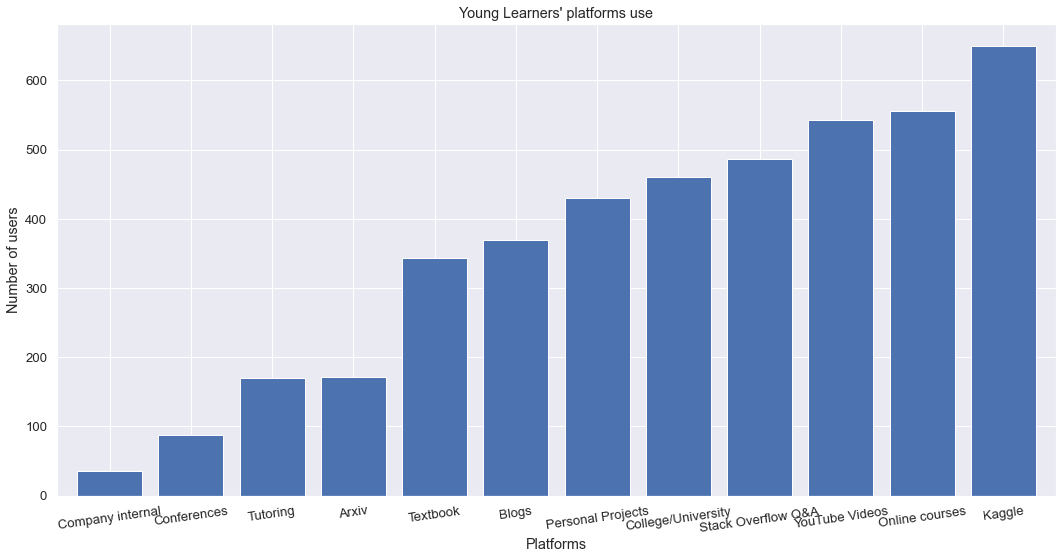

In [199]:
data_young = learners[(learners['Age']<=22)]
d_plat2 = {}
for platform in platforms:
    d_plat2[platform] = 0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem:
            d_plat2[platform]+=1

s = pd.DataFrame.from_dict(data=d_plat2, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar', figsize=(15, 8), width=0.8, align='center')
ax.legend_.remove()
ax.set_title("Young Learners' platforms use")
ax.set_xlabel('Platforms')
ax.set_ylabel('Number of users')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_rotation(8)
plt.tight_layout()

College/University가 7위에서 5위로 올라왔습니다. 미국만 살펴보겠습니다.

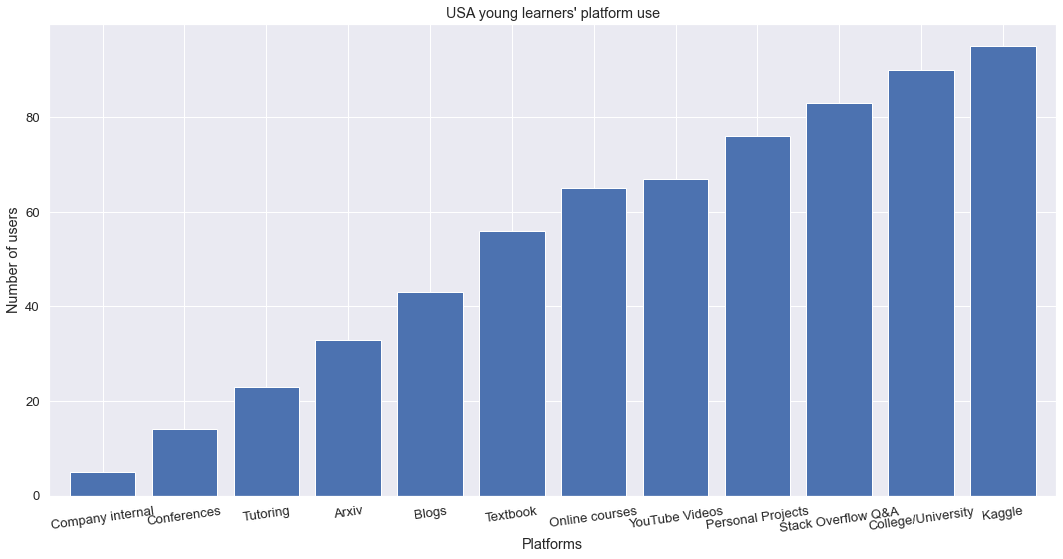

In [200]:
data_young = learners[(learners['Age']<=22) & (learners['Country']=='United States')]
d_plat2 = {}
for platform in platforms:
    d_plat2[platform] = 0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem:
            d_plat2[platform]+=1

s = pd.DataFrame.from_dict(data=d_plat2, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar', figsize=(15, 8), width=0.8, align='center')
ax.legend_.remove()
ax.set_title("USA young learners' platform use")
ax.set_xlabel("Platforms")
ax.set_ylabel('Number of users')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_rotation(8)
plt.tight_layout()

College/University은 두 번째로 많이 사용되는 플랫폼이 되고 더 이상 Kaggle에 의해 수적으로 우세하지 않습니다.

문제는 몇몇 나라에서, 대학들은 특정한 데이터 과학 교육을 받지 못했고 아직도 받지 못하고 있다는 것입니다. 종종, 프로그램들은 수학이나 컴퓨터 과학에 초점을 맞추어서 학생들은 혼자서 배워야 합니다. 미국에서는 점점 더 많은 대학(MIT, Columbia, Stanford...)이 관심 있는 학생들을 위해 특정 데이터 과학 석사 또는 최소한 기계 학습 과정을 제공하고 있습니다.

이것이 대부분의 국가에서 학생들이 대학 밖에서 데이터 과학에 대해 훨씬 더 많이 배운다고 느끼는 이유입니다.

이제 이러한 동일한 플랫폼이 학습자에게 얼마나 유용한지 알아보겠습니다.

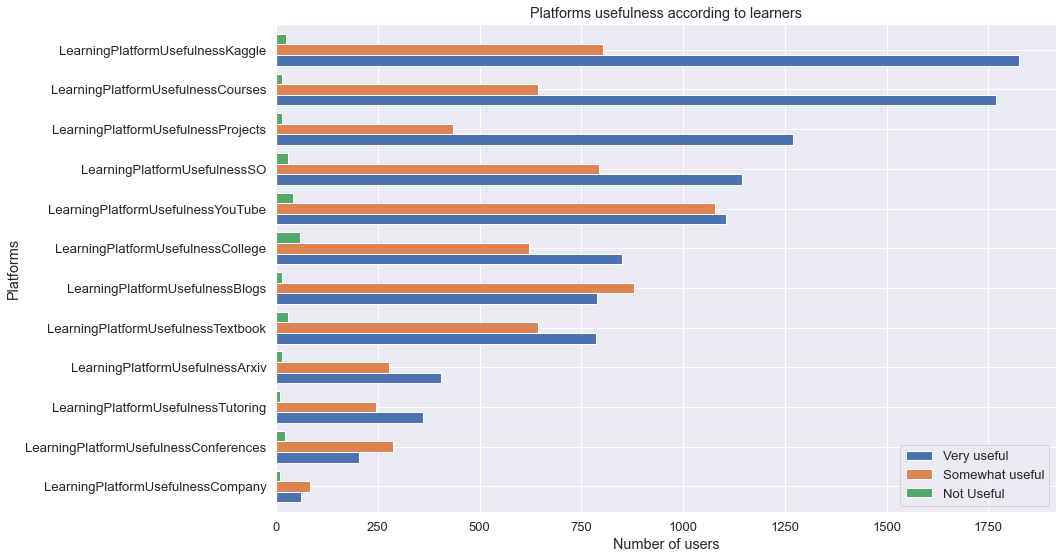

In [201]:
d_useful={}
plat_use=['LearningPlatformUsefulnessArxiv','LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessCollege',
          'LearningPlatformUsefulnessCompany','LearningPlatformUsefulnessConferences',
          'LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects',
          'LearningPlatformUsefulnessSO','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessTutoring',
          'LearningPlatformUsefulnessYouTube']

for plat in plat_use:
    L = learners[plat].value_counts()
    d_useful[plat] = {'Very useful': L.loc['Very useful'],
                      'Somewhat useful': L.loc['Somewhat useful'],
                      'Not Useful': L.loc['Not Useful']}
    
s = pd.DataFrame.from_dict(data=d_useful, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh', figsize=(15, 8), width=0.8, align='center')
ax.set_title("Platforms usefulness according to learners")
ax.set_ylabel('Platforms')
ax.set_xlabel('Number of users')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()

우리는 Kaggle과 Coursera가 DS 학습에 가장 많이 사용되는 플랫폼임을 확인했습니다. 이 플롯을 통해 학습자들 사이에서 가장 유용하다고 여겨지는 플랫폼이기도 하며, 세 번째로 가장 유용한 플랫폼(프로젝트)을 훨씬 앞서는 플랫폼이기도 합니다.
또한 플랫폼의 상대적 유용성은 동일한 플랫폼을 사용하는 학습자의 수와 밀접한 관련이 있습니다. 실제로 가장 많이 사용되는 플랫폼이 마지막 두 그림에 따라 가장 유용합니다.

어떤 온라인 플랫폼이 데이터 과학 학습자들에게 가장 인기 있는지 알아보겠습니다.

In [202]:
d_online = {}
online_plat = ['Coursera', 'Udacity', 'edX', 'DataCamp', 'Other']

for plat in online_plat:
    d_online[plat] = 0
    for elem in learners['CoursePlatformSelect'].fillna('Missing'):
        if plat in elem:
            d_online[plat] += 1

online = pd.DataFrame.from_dict(d_online, orient='index')

labels = (np.array(online.index))
proportions = np.array((online[0] / online[0].sum())*100)

trace = go.Pie(labels=labels, values=proportions,
               hoverinfo='label+percent')

layout = go.Layout(
    title = 'Online Platforms popularity'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Online_plat')

Coursera는 Udacity, edX 및 DataCamp에 대해 확실한 우위를 점하고 있습니다. 이것은 많은 사람들에게 머신 러닝을 소개하는데 도움을 준 Andrew NG의 유명한 과정과 관련이 있을 것입니다.

이제 내년에 학습자들이 무엇을 배우기를 고대하는지 알아보겠습니다.

### Method and Tool to learn next year

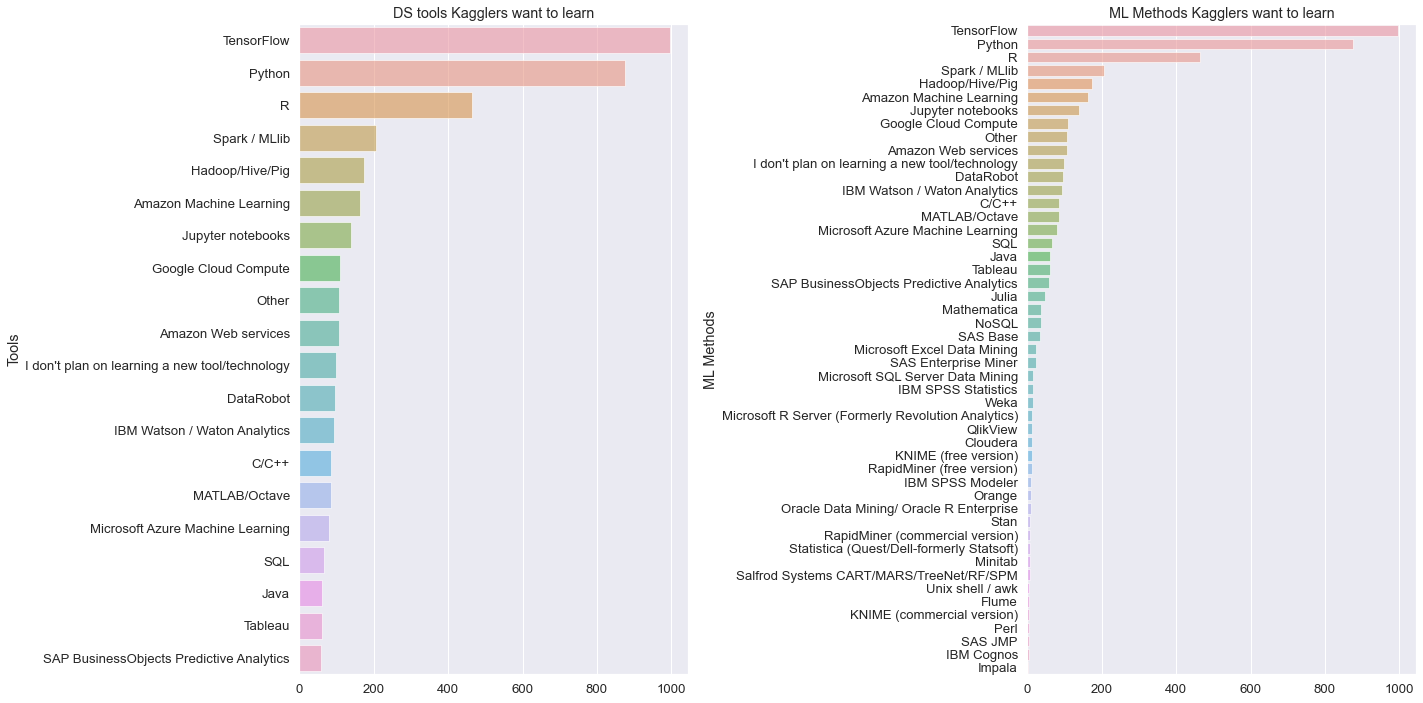

In [203]:
f, ax = plt.subplots(1,2, figsize=(20, 10))

tools = learners['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=tools.index, x=tools.values, alpha=0.6, ax=ax[0])
ax[0].set_title('DS tools Kagglers want to learn')
ax[0].set_xlabel('')
ax[0].set_ylabel('Tools')

methods = learners['MLToolNextYearSelect'].value_counts()
sns.barplot(y=methods.index, x=methods.values, alpha=0.6, ax=ax[1])
ax[1].set_title('ML Methods Kagglers want to learn')
ax[1].set_xlabel('')
ax[1].set_ylabel('ML Methods')

plt.tight_layout()
plt.show()

Kagglers가 가장 배우고자 하는 방법은 딥 러닝입니다. 신경망이 딥러닝에 포함되어 있다고 생각합니다. 그리고 우리가 도구를 검토할 때, 사람들은 딥러닝에 가장 많이 사용되는 도구인 TensorFlow를 마스터하고 싶어하기 때문에 결과는 거의 같습니다!

이제 Kaggler 학습자가 해당 플랫폼에서 DS 학습에 얼마나 많은 시간을 할애하는지, DS/ML을 몇 년 동안 배워왔는지 살펴보겠습니다.

### Time invested on DS training


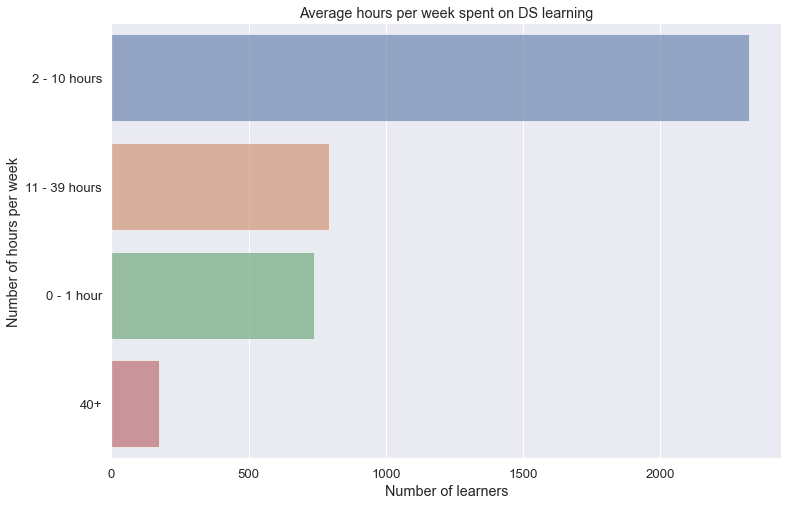

In [204]:
plt.figure(figsize=(12,8))
time = data['TimeSpentStudying'].value_counts()
sns.barplot(y=time.index, x=time.values, alpha=0.6)
plt.title('Average hours per week spent on DS learning')
plt.xlabel('Number of learners')
plt.ylabel('Number of hours per week')
plt.show()

대부분의 학습자는 데이터 과학을 일주일에 2시간에서 10시간을 배우는데, 이는 학습이 한 번에 하나의 온라인 과정으로 구성될 경우 소비되는 양입니다.
약 1000명의 학습자(총 5494명)가 일주일에 11시간 이상을 소비한다고 합니다. 이들은 아마도 데이터 과학 프로그램에 등록한 학생이거나 DS 학습에 전념하는 학습자일 것입니다. DS 학습에 투자할 시간이 자연히 적은 직업 전환을 찾는 근로자에게는 해당되지 않습니다.

Kagglers가 데이터 과학을 몇 년 동안 배워왔는지 봅시다.

In [205]:
start = data['LearningDataScienceTime'].value_counts()
labels = (np.array(start.index))
values = (np.array((start / edu.sum()) * 100))

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20))
layout = go.Layout(
    title = 'Years invested in Data Science Learning'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='nb_yers')

학습자 중 84.1%는 최대 2년 전에 DS 교육을 시작했는데 비해 5년 이상 전에 시작한 학생의 3.5%에 불과합니다!
이는 지난 몇 년 동안 데이터 사이언스의 영향과 그 폭발적인 성장을 보여줍니다.

그 다음에는 필요에 따라 스킬 순위를 매기는 것부터 시작하여 DS 지식의 순위를 매기는 것부터 시작하여 학습자가 데이터 사이언스의 전문적 측면을 어떻게 인식하는가에 초점을 맞춥니다.

### Skills and proofs of knowledge for landing a DS job


Text(0, 0.5, 'Skills')

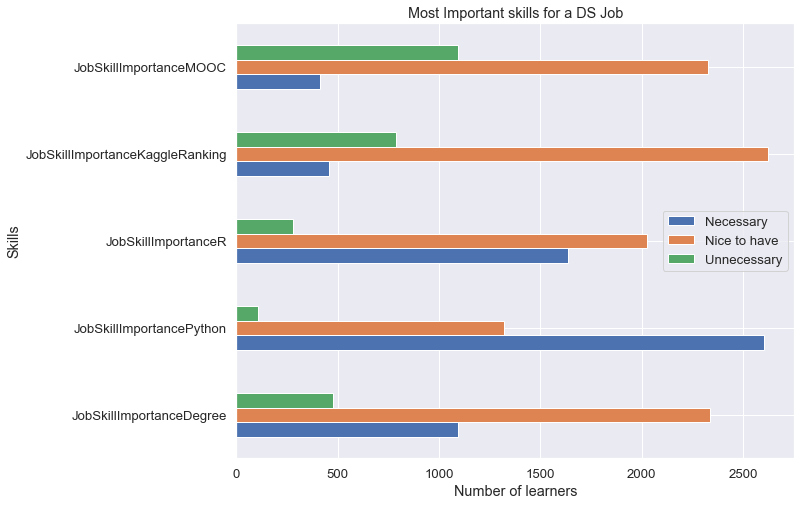

In [206]:
df2 = data
d_jobskills = {}
job_skills = ['JobSkillImportanceDegree','JobSkillImportancePython','JobSkillImportanceR',
              'JobSkillImportanceKaggleRanking','JobSkillImportanceMOOC']
for skill in job_skills:
    L = df2[skill].value_counts()
    d_jobskills[skill] = {'Necessary': L.loc['Necessary'],
                          'Nice to have': L.loc['Nice to have'],
                          'Unnecessary': L.loc['Unnecessary']}
    
(pd.DataFrame(d_jobskills)).transpose().plot(kind='barh', figsize=(10,8))
plt.title('Most Important skills for a DS Job')
plt.xlabel('Number of learners')
plt.ylabel('Skills')

Data Science 학습자에게 있어 Python을 마스터하는 것은 Data Science!의 작업에 있어 가장 중요한 기술입니다. 대부분의 학습자들은 학위가 필수 과목보다 더 좋은 자산이라고 생각합니다.

ML/DS에 대한 지식을 증명할 수 있는 방법은 무엇입니까?

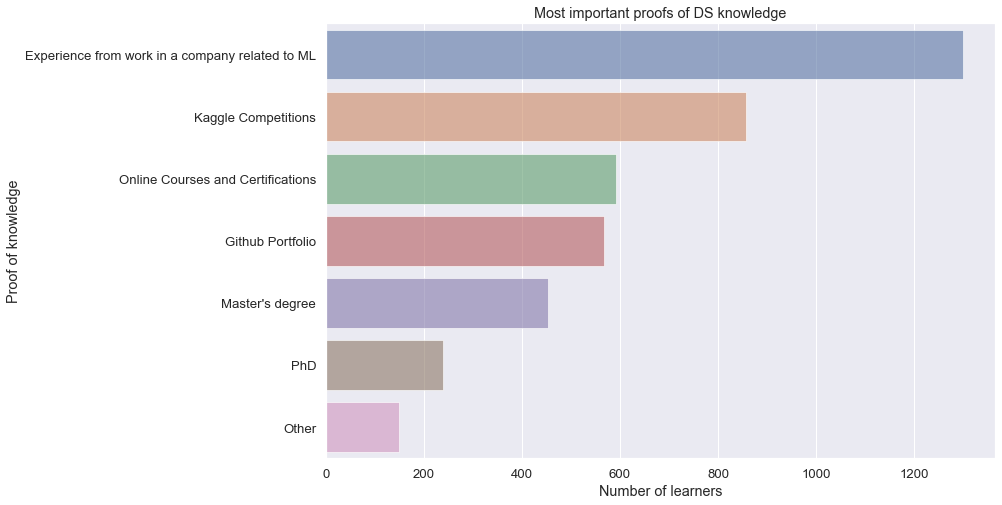

In [207]:
plt.figure(figsize=(12, 8))
proof = learners['ProveKnowledgeSelect'].value_counts()
sns.barplot(y=proof.index, x=proof.values, alpha=0.6)
plt.title('Most important proofs of DS knowledge')
plt.xlabel('Number of learners')
plt.ylabel('Proof of knowledge')
plt.show()

학습자에게 ML/DS에 대한 지식을 증명할 수 있는 가장 중요한 방법은 무엇입니까?

석사학위와 박사학위가 좋은 순위를 차지하지 못하는데, 이는 대부분의 학습자들이 DS에 취업하기 위해 학위가 필요하지 않다고 생각하기 때문입니다. 그렇다고 해서 MOOC가 석사학위보다 더 중요하다는 사실에 동의하지 않을 것이고, 기업들이 온라인 과정 자격증을 수학/컴퓨터 과학 석사나 관련 분야보다 더 중요하게 여기지 않는다고 생각합니다.

ML에서의 이전 업무 경험이 1위입니다. 실습 경험은 특히 코딩에 관한 한 채용 담당자들에게 항상 유용합니다.

지금까지 데이터 과학 기술을 완벽하게 익히는 데 얼마나 많은 시간이 소요되었는지, DS에 입사하는 데 중요하다고 생각하는 요소들을 살펴보았고, ML/DS 지식을 입증하는 가장 중요한 방법이 무엇인지 살펴봤습니다.

그러면 학습자가 마침내 DS 경력을 시작할 준비가 되었을 때, 그는 DS 직업을 찾기 위해 어떤 자원을 사용할까요? 그는 직업을 찾는데 얼마나 많은 시간을 소비하고 그의 꿈의 직업의 특징들은 무엇일까요? 

### Learners' job hunt

In [208]:
job_s = learners['JobSearchResource'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum())*100))
          
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=False)
          
layout = go.Layout(
    title = 'Most used resources for finding a DS job'
)
          
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Job_resource')

학습자에 따른 상위 3개 리소스는 다음과 같습니다.

1. 회사의 업무 목록 페이지입니다.
2. 기술별 작업 게시판(예: 스택 오버플로 채용 플랫폼)입니다.
3. 일반 작업 게시판(LinkedIn)입니다.

이제 직장을 구하는 데 보낸 시간을 살펴봅니다

In [209]:
job_s = learners['JobHuntTime'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum()) * 100))

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=True)

layout = go.Layout(title='Hours per week spent looking for a data science job?')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Job_resource')

- 학습자의 40.2%는 실제로 직업을 찾고 있지 않습니다. 일부는 여전히 대학/대학에 등록되어 있고 다른 일부는 (경력 전환에 대해 '예'라고 대답한) 자신이 일하는 회사 내에서 자리를 바꾸려고 할 수도 있다는 사실을 잊지 마십시오.
- 34.5%는 일주일에 한두 시간씩 일자리를 찾는 데 소비하는데, 이는 일자리를 찾고 싶은 충동이 없다는 것을 의미합니다. 인턴쉽을 찾고 있는 학생일 수도 있고, 흥미로운 기회가 어딘가에 있는지 수시로 확인하는 고용인일 수도 있습니다.
- 10%가 조금 넘는 사람들이 적극적으로 구직 활동을 하고 있으며, 일주일에 최소 6시간을 구직 활동에 쓰고 있습니다.

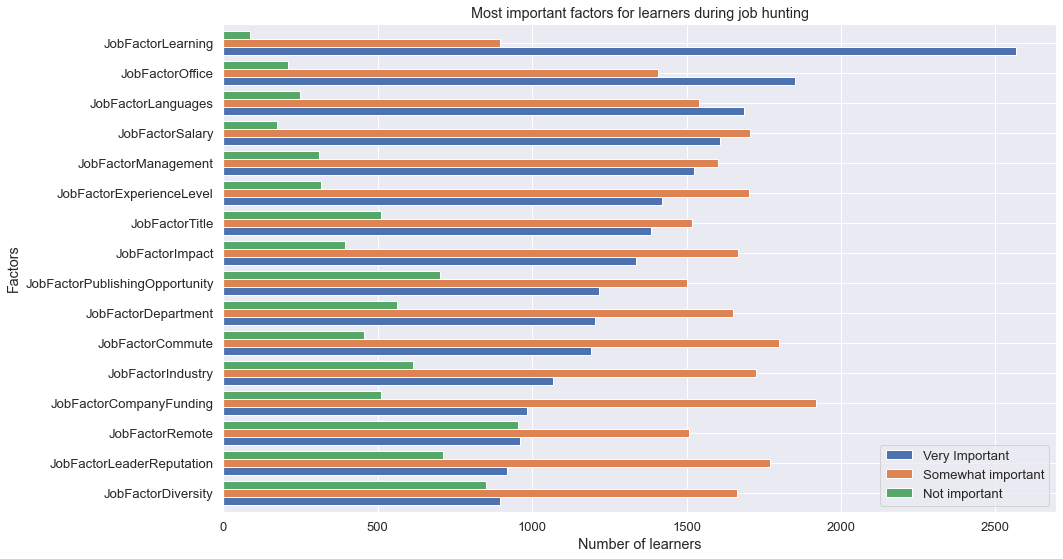

In [210]:
d_criterias={}
criterias_job=['JobFactorLearning','JobFactorSalary','JobFactorOffice','JobFactorLanguages',
               'JobFactorCommute','JobFactorManagement','JobFactorExperienceLevel',
               'JobFactorDepartment','JobFactorTitle','JobFactorCompanyFunding','JobFactorImpact',
               'JobFactorRemote','JobFactorIndustry','JobFactorLeaderReputation','JobFactorDiversity',
               'JobFactorPublishingOpportunity']

for criteria in criterias_job:
    L = df2[criteria].value_counts()
    d_criterias[criteria] = {'Very Important': L.loc['Very Important'],
                             'Somewhat important': L.loc['Somewhat important'],
                             'Not important': L.loc['Not important']}
    
s = pd.DataFrame.from_dict(data=d_criterias, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh', figsize=(15,8), width=0.8, align='center')
ax.set_title('Most important factors for learners during job hunting')
ax.set_ylabel('Factors')
ax.set_xlabel('Number of learners')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()

이 그림에서 인자는 '가장 중요한' 기준에 따라 순서가 지정됩니다.

DS 학습자들은 발전을 위해 끊임없이 노력하고 있습니다! 구직 중에 가장 중요한 요소는 단연코 그 직업이 그들에게 전문적 발전의 기회를 줄 수 있을 것인가 하는 것입니다.
두 번째로 중요한 요소는 그들이 일할 사무실 환경입니다.
세 번째는 프로그래밍 언어와 프레임워크입니다. 이는 데이터 과학자가 회사가 어떤 기술을 사용하든 실제로 사용할 수 없다는 것을 보여줍니다. 그들은 한 직업을 다른 직업보다 선택하는 데 중요한 강력한 선호도를 가지고 있습니다.
급여는 4위이며 다른 요인에 가깝기 때문에 데이터 과학자가 원하는 경우에는 그다지 문제가 되지 않는 것 같습니다. 아마도 이미 급여가 높을 것이라고 확신하고 있기 때문일 것입니다!